# House Prices Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'medium',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'}

sns.set_style('darkgrid')
sns.set_context('notebook')

plt.rcParams.update(params)

In [3]:
# config for show max number of output lines
pd.options.display.max_colwidth = 600
pd.options.display.max_rows = 85
pd.options.display.max_columns = 85

In [4]:
# modeling utilities
import pickle
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [5]:
# Load train & test datasets
df = pd.read_csv('./Dataset/Dataset.csv')

## Summarize Data

In [6]:
# Display dimension of datasets
print('Train data shape', df.shape)
print(f'There are {df.shape[0]} entries')
print(f'There are {df.shape[1]} features')

Train data shape (1460, 81)
There are 1460 entries
There are 81 features


# Peek of the dataset

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# dataset summary stats
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Types in the Dataset

In [9]:
# data types of attributes of train set
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


## Missing values

Need to deep dive into analysis NaN value of each column.

In [10]:
# Count unique missing value of each column
for column in df.columns:
    if df[column].isnull().values.any():
        print(column + ":", end = "")
        print(df[column].isnull().sum())

LotFrontage:259
Alley:1369
MasVnrType:872
MasVnrArea:8
BsmtQual:37
BsmtCond:37
BsmtExposure:38
BsmtFinType1:37
BsmtFinType2:38
Electrical:1
FireplaceQu:690
GarageType:81
GarageYrBlt:81
GarageFinish:81
GarageQual:81
GarageCond:81
PoolQC:1453
Fence:1179
MiscFeature:1406


In [11]:
total_missing = df.isnull().sum().sort_values(ascending=False)
ratio_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent_missing = ((df.isnull().sum() / df.isnull().count()) * 100).sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")
missing_data = pd.concat([total_missing, ratio_missing, percent_missing], axis=1, keys=['Total', 'Ratio', 'Percent'])
missing_data['Type'] = df[missing_data.index].dtypes

missing_data = missing_data[(missing_data['Total'] > 0)]

# display missing data
missing_data

,Total,Ratio,Percent,Type
PoolQC,1453,0.995205,99.52%,object
MiscFeature,1406,0.963014,96.30%,object
Alley,1369,0.937671,93.77%,object
Fence,1179,0.807534,80.75%,object
MasVnrType,872,0.597260,59.73%,object
FireplaceQu,690,0.472603,47.26%,object
LotFrontage,259,0.177397,17.74%,float64
GarageYrBlt,81,0.055479,5.55%,float64
GarageCond,81,0.055479,5.55%,object
GarageType,81,0.055479,5.55%,object


### Numerical Missing values

In [12]:
print('Numerical Missing Values:')
print('=========================')
for col_missing in missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] != 'object')].index.values:
    print(f'{col_missing:<30} {missing_data["Total"][col_missing]:>10} NaNs')
print('=========================')

Numerical Missing Values:
LotFrontage                           259 NaNs
GarageYrBlt                            81 NaNs
MasVnrArea                              8 NaNs


### Categorical Missing values

In [13]:
print('Categorical Missing Values:')
print('=========================')
for col_missing in missing_data[(missing_data['Total'] > 0) & (missing_data['Type'] == 'object')].index.values:
    print(f'{col_missing:<30} {missing_data["Total"][col_missing]:>10} NaNs')
print('=========================')

Categorical Missing Values:
PoolQC                               1453 NaNs
MiscFeature                          1406 NaNs
Alley                                1369 NaNs
Fence                                1179 NaNs
MasVnrType                            872 NaNs
FireplaceQu                           690 NaNs
GarageCond                             81 NaNs
GarageType                             81 NaNs
GarageFinish                           81 NaNs
GarageQual                             81 NaNs
BsmtFinType2                           38 NaNs
BsmtExposure                           38 NaNs
BsmtQual                               37 NaNs
BsmtCond                               37 NaNs
BsmtFinType1                           37 NaNs
Electrical                              1 NaNs


## Analysis SalePrice that is the target of prediction

In [14]:
df['SalePrice'].describe().apply(lambda x: f"{x:.2f}")

count      1460.00
mean     180921.20
std       79442.50
min       34900.00
25%      129975.00
50%      163000.00
75%      214000.00
max      755000.00
Name: SalePrice, dtype: object

In [15]:
df['SalePrice'].skew()

1.8828757597682129

In [16]:
# df['SalePrice'].kurt()

# Visualizing the SalePrice distribution of train dataset

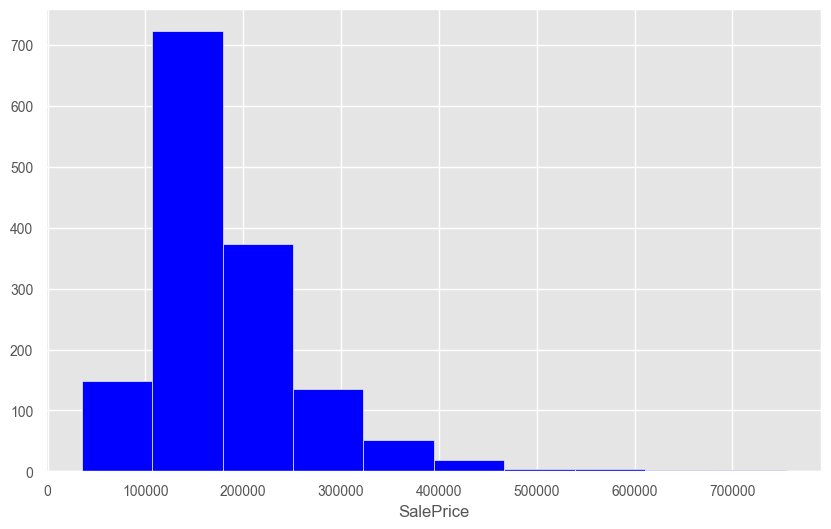

In [17]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(df['SalePrice'], color='blue')
plt.xlabel('SalePrice')
plt.show()

# Visualizing the SalePrice distribution of train dataset with log1p to reduce the skewness

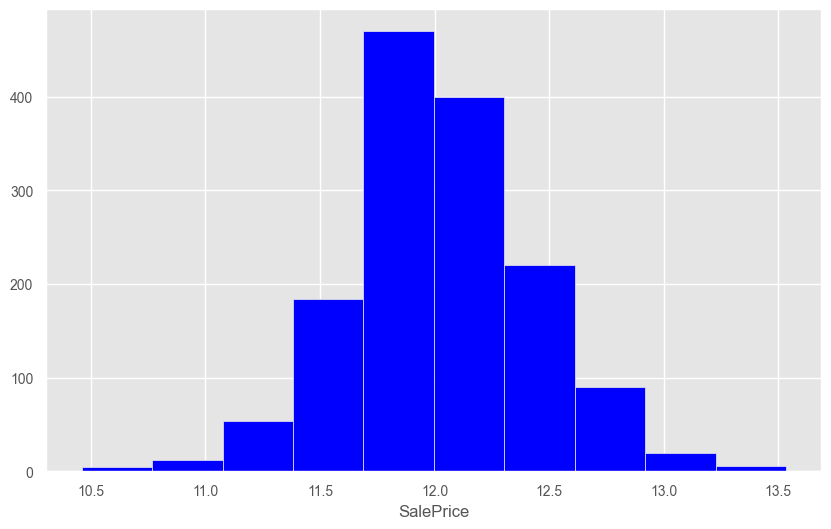

In [18]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(np.log1p(df['SalePrice']), color='blue')
plt.xlabel('SalePrice')
plt.show()

## Numerical Features

Matrix heatmap help to indentify correlation between the target and other features

<Axes: >

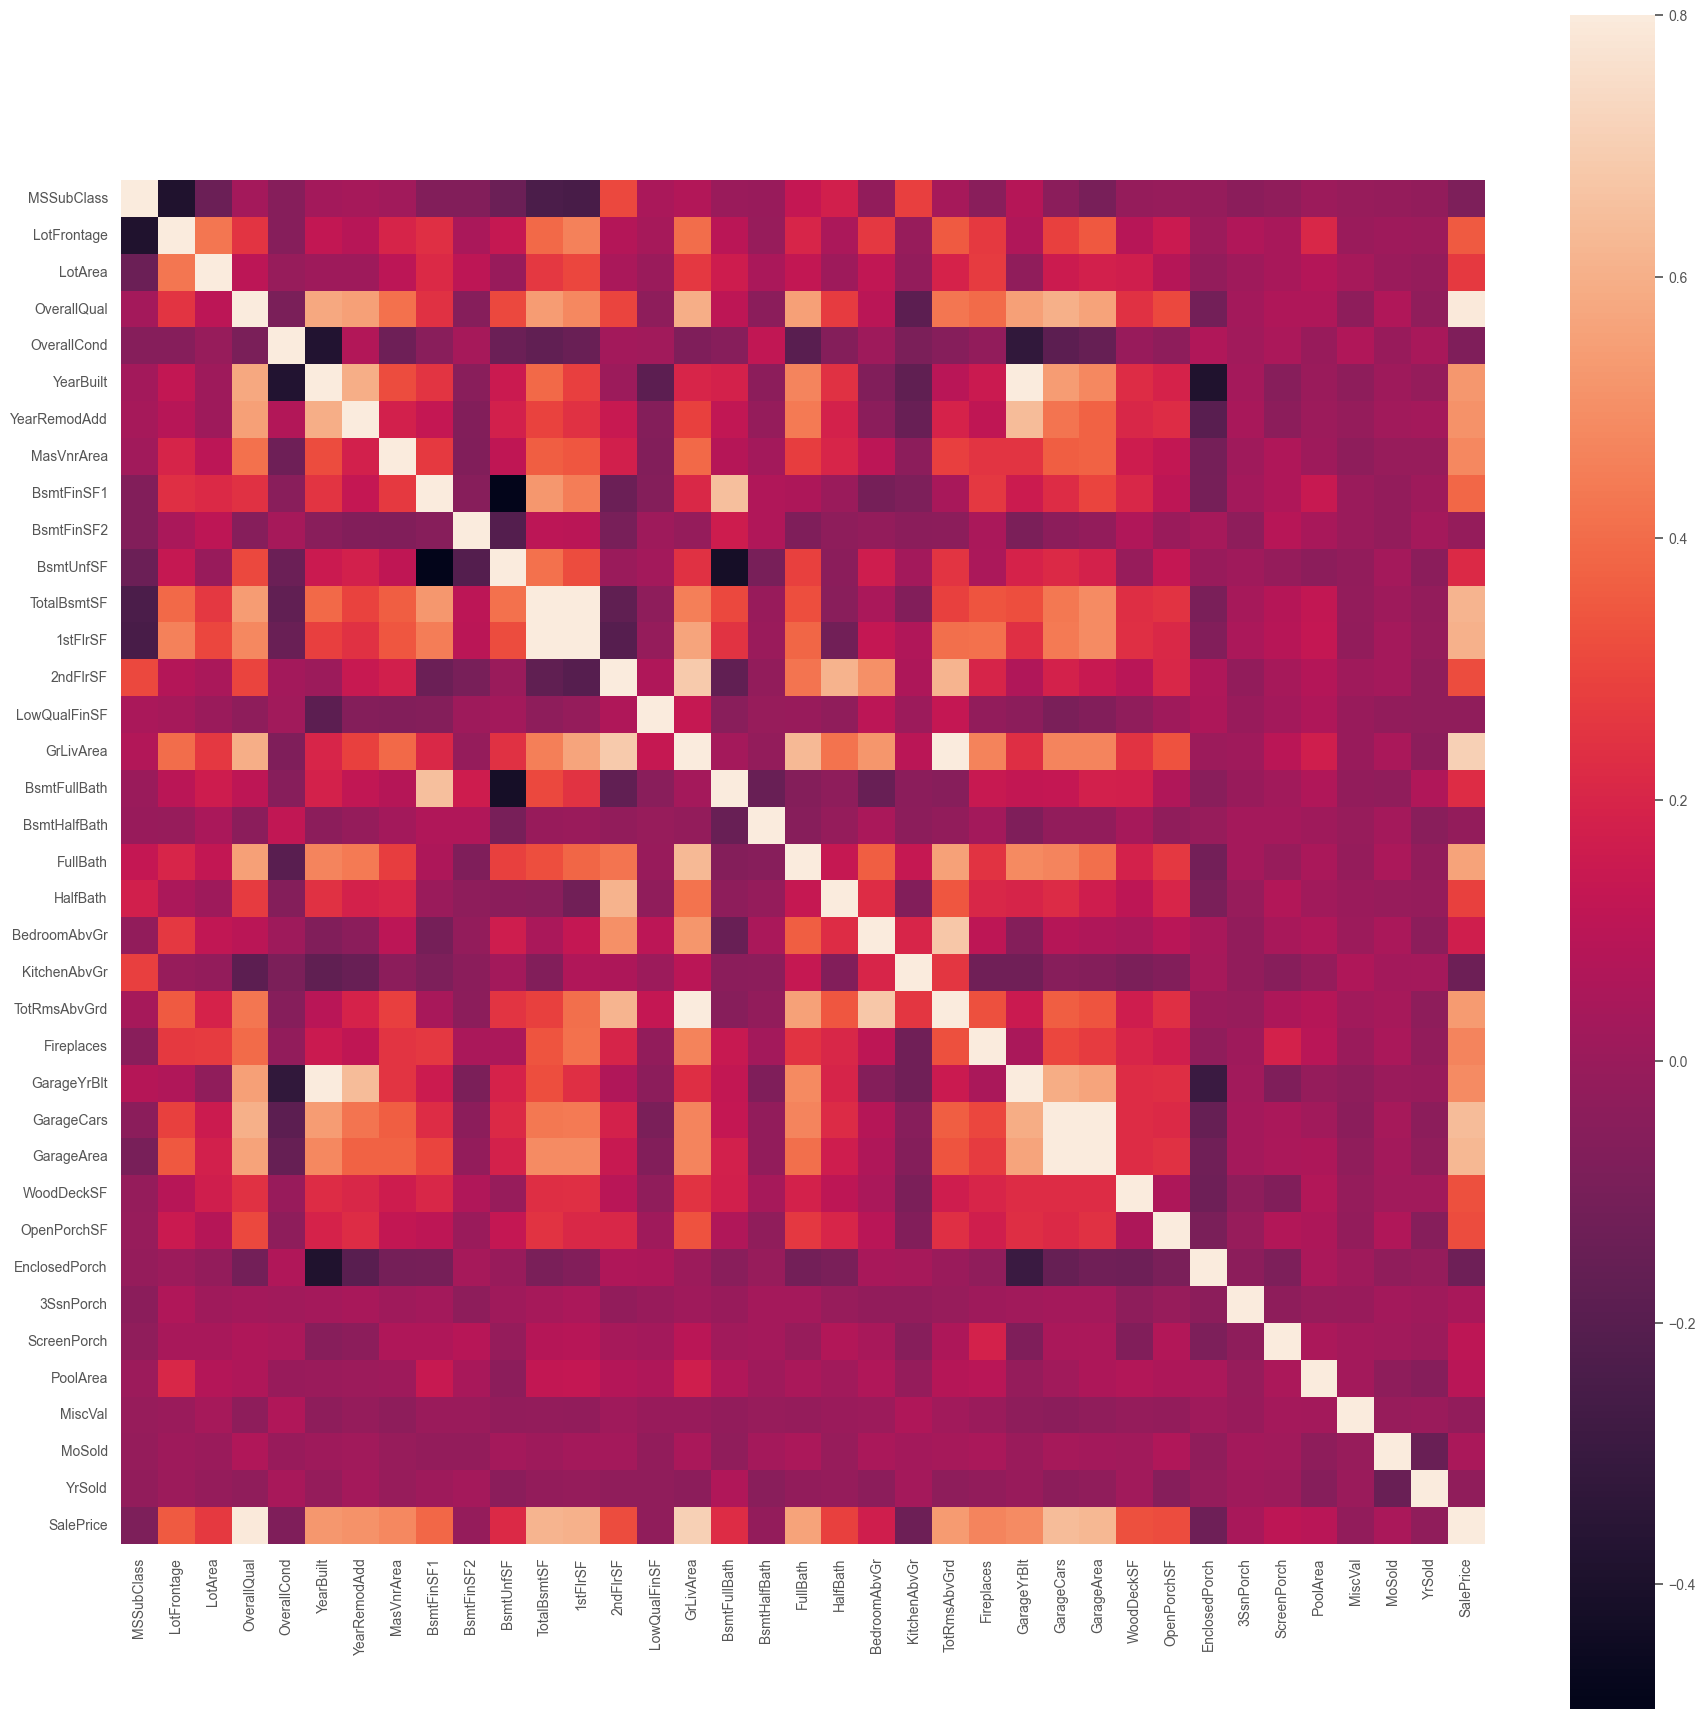

In [19]:
corr = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [20]:
# Correlation between attributes with SalePrice
corr_list = corr['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

## Visualize Correlated Attributes

Visualizing top 10 related attributes to the target

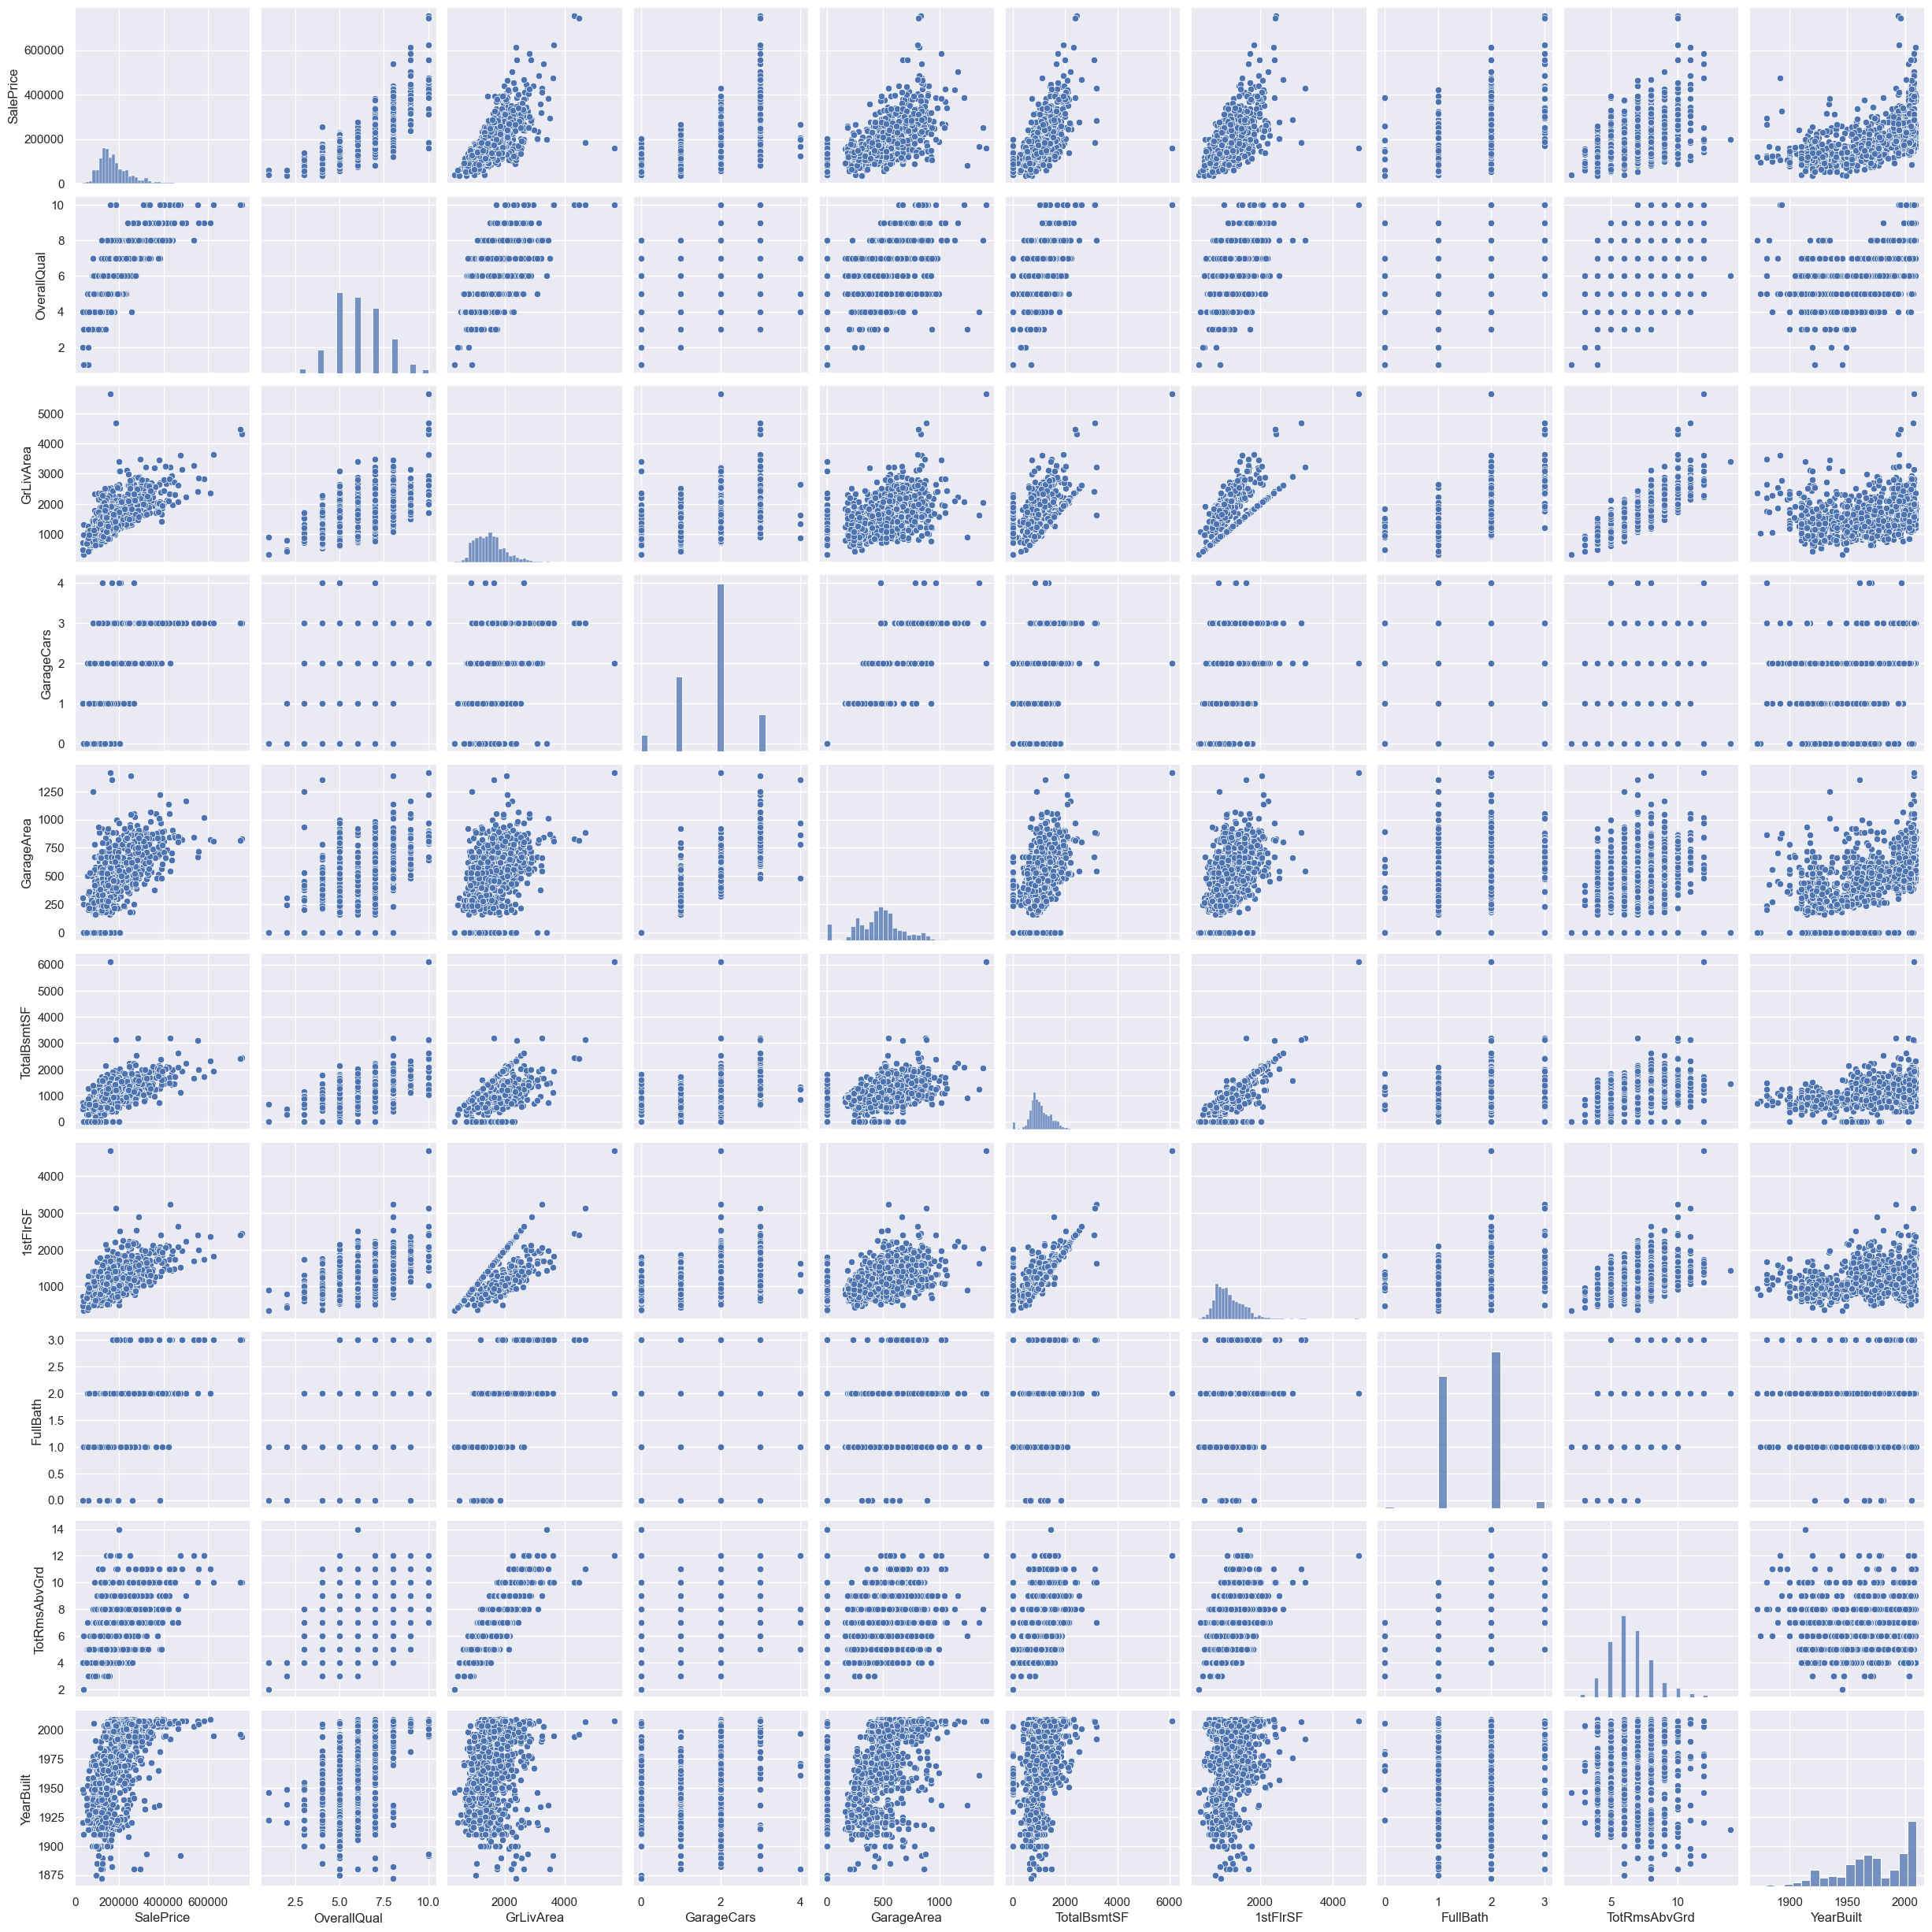

In [21]:
# Scatter plotting the variables most correlated with SalePrice
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
sns.set()
sns.pairplot(df[cols], size=2.5)
plt.show()

## Categorical Features

In [22]:
cat_df = df.select_dtypes(include=['object'])

In [23]:
cat_df.shape

(1460, 43)

In [24]:
cat_df.dtypes

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

### Box plotting for 15 first categorical attributes

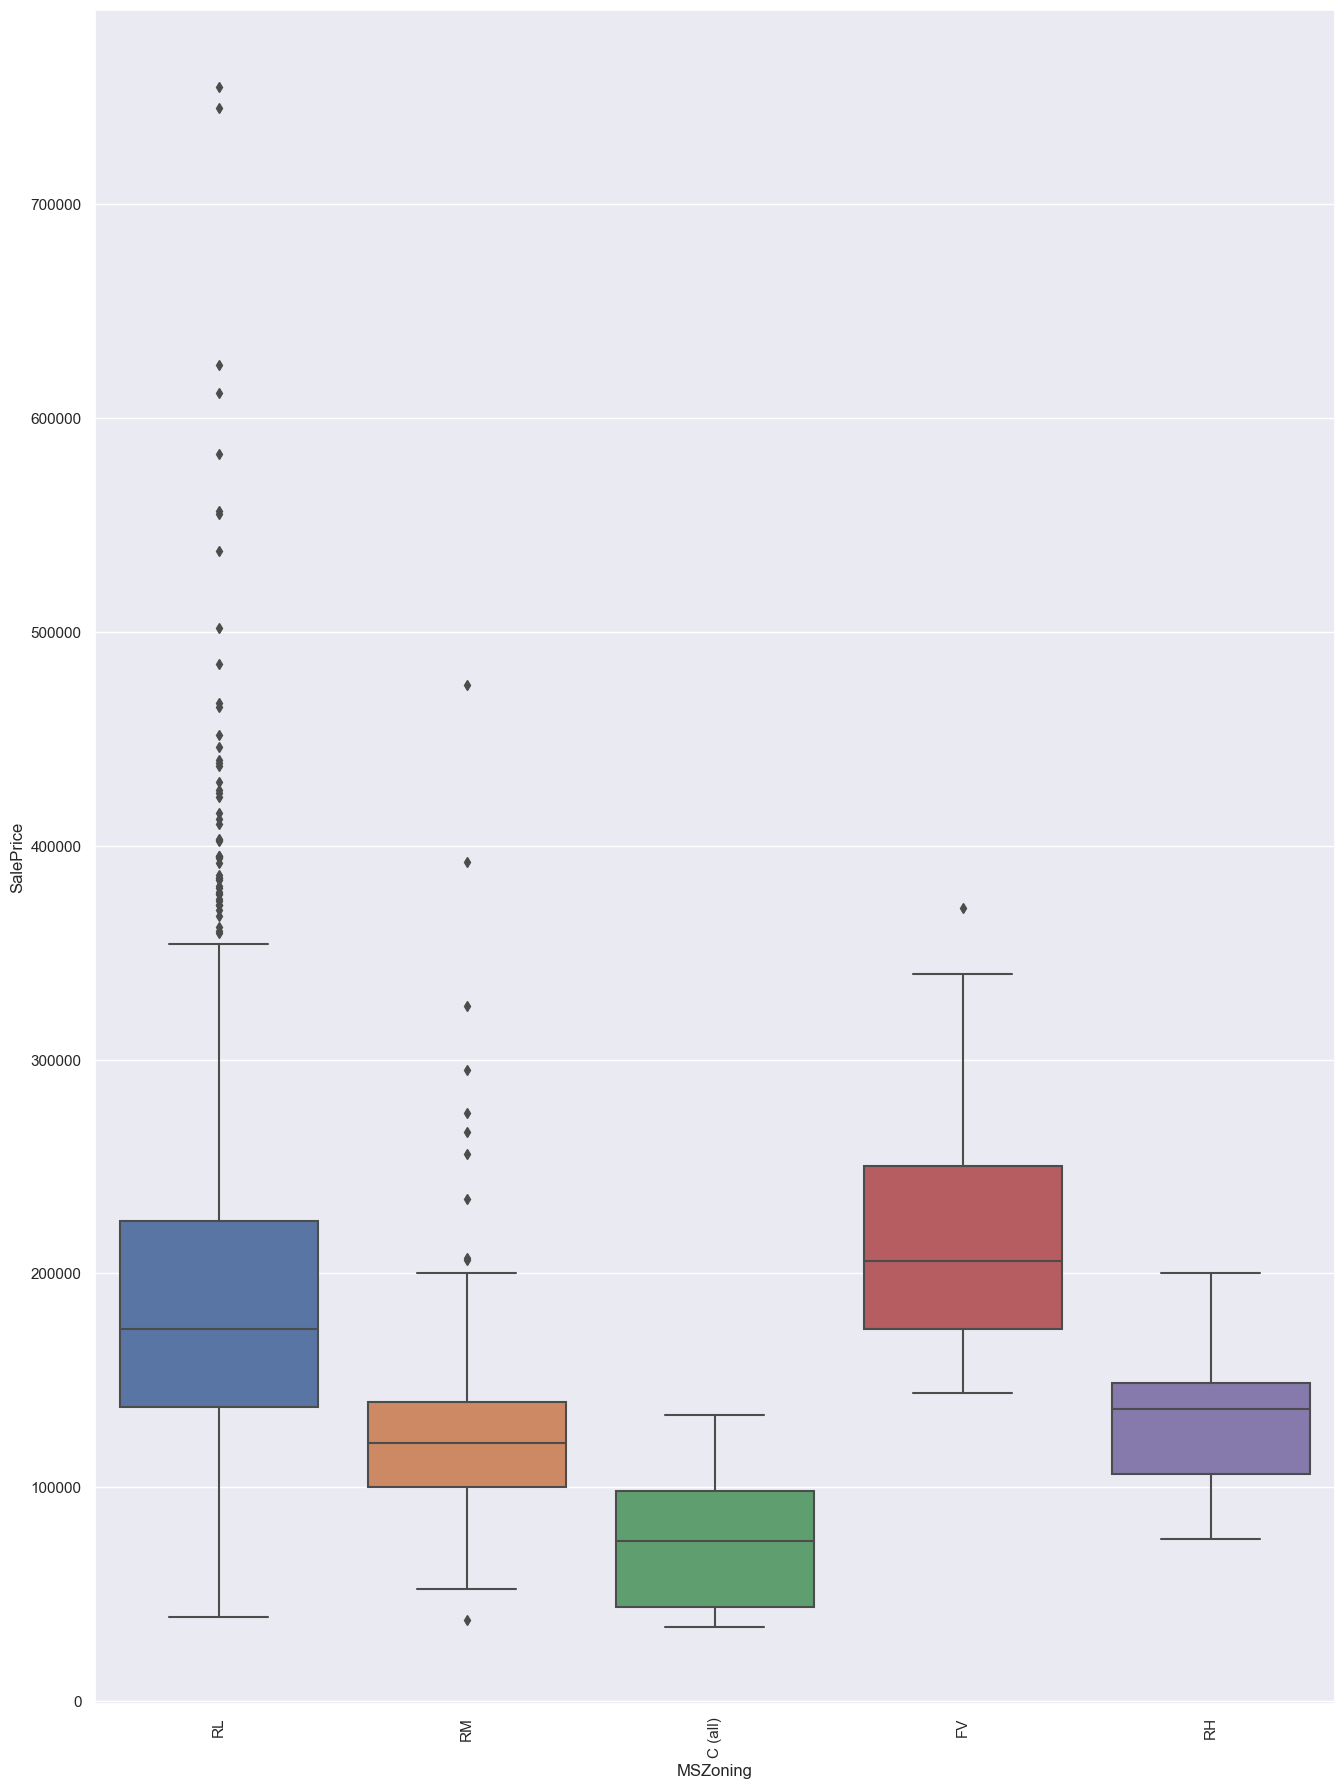

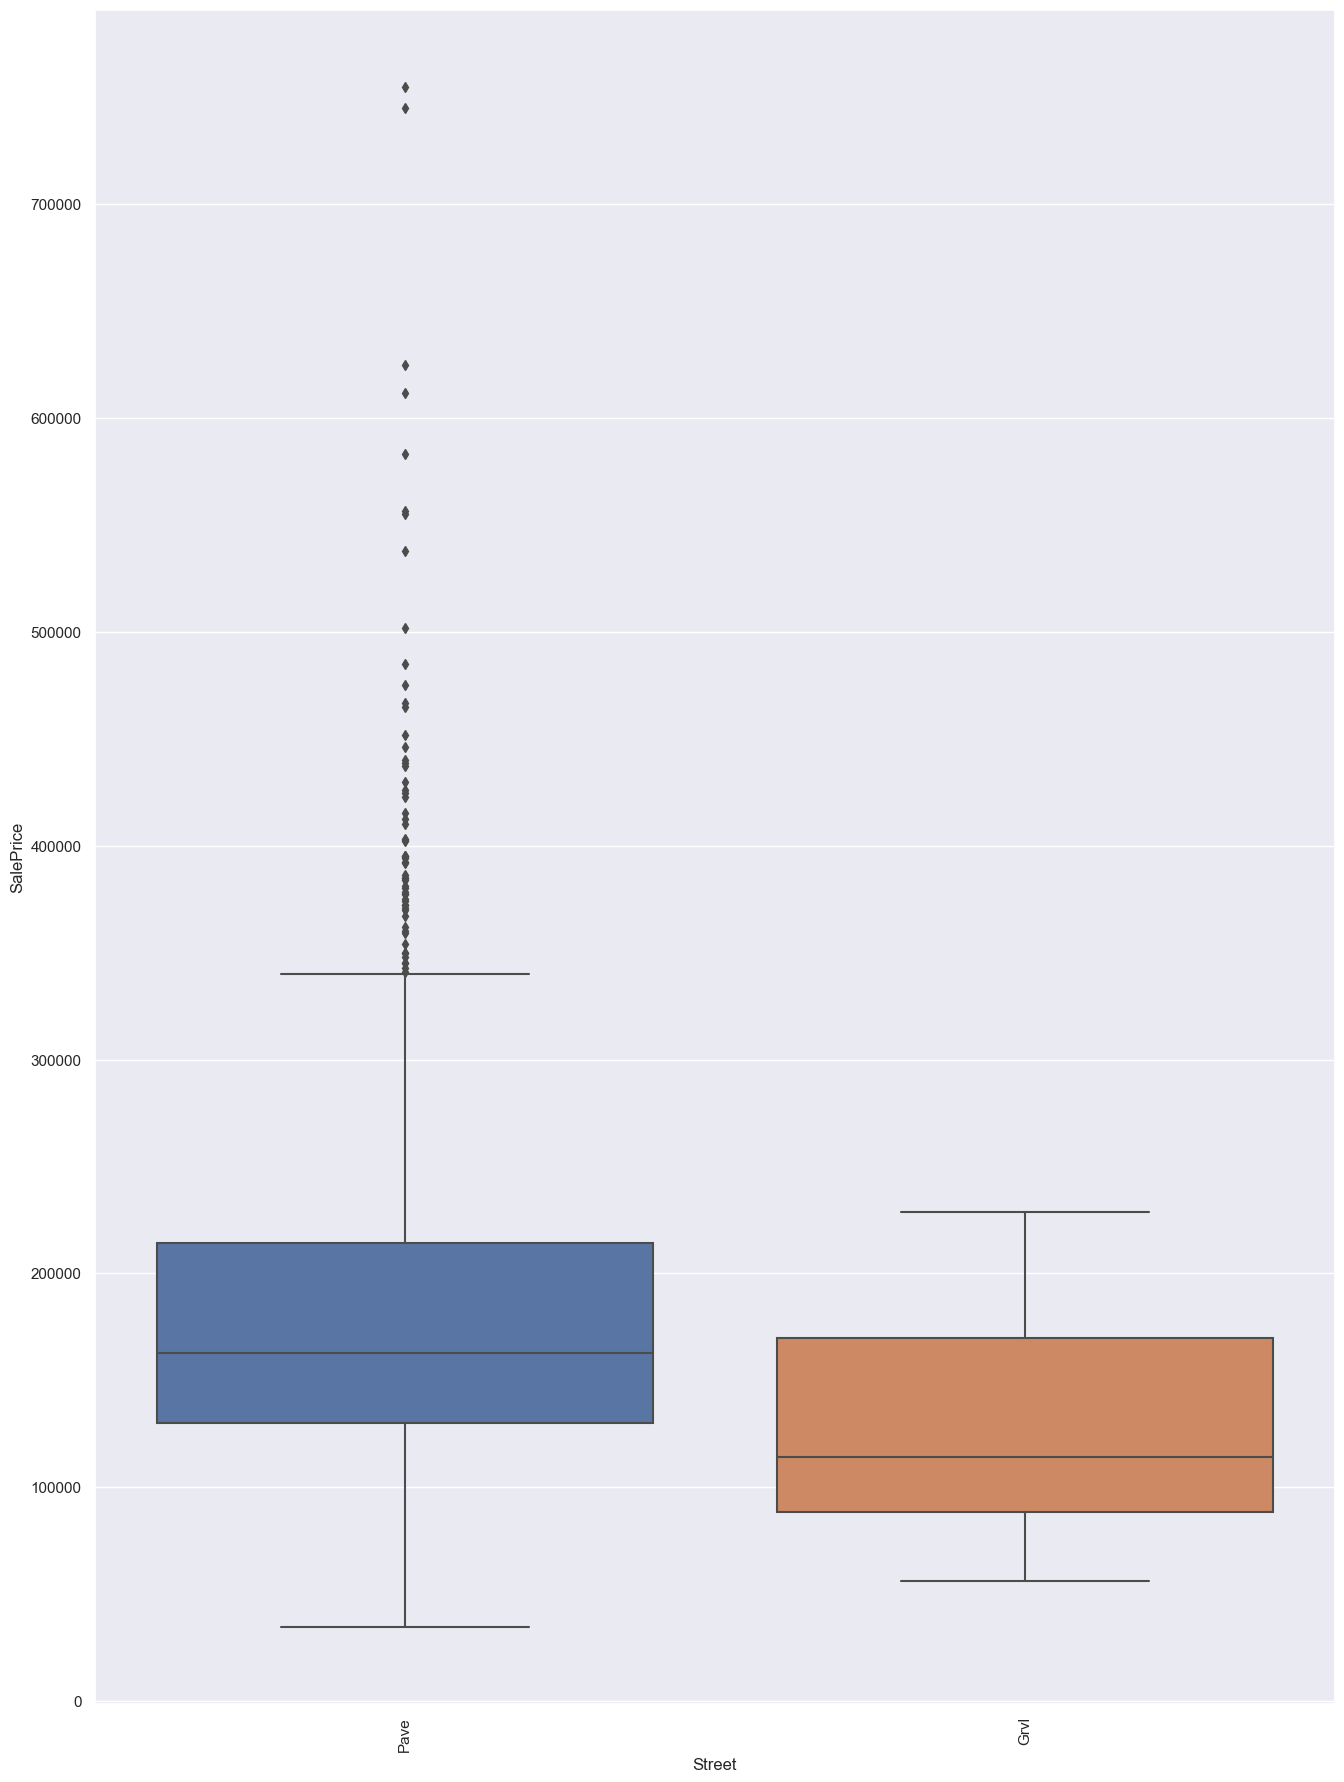

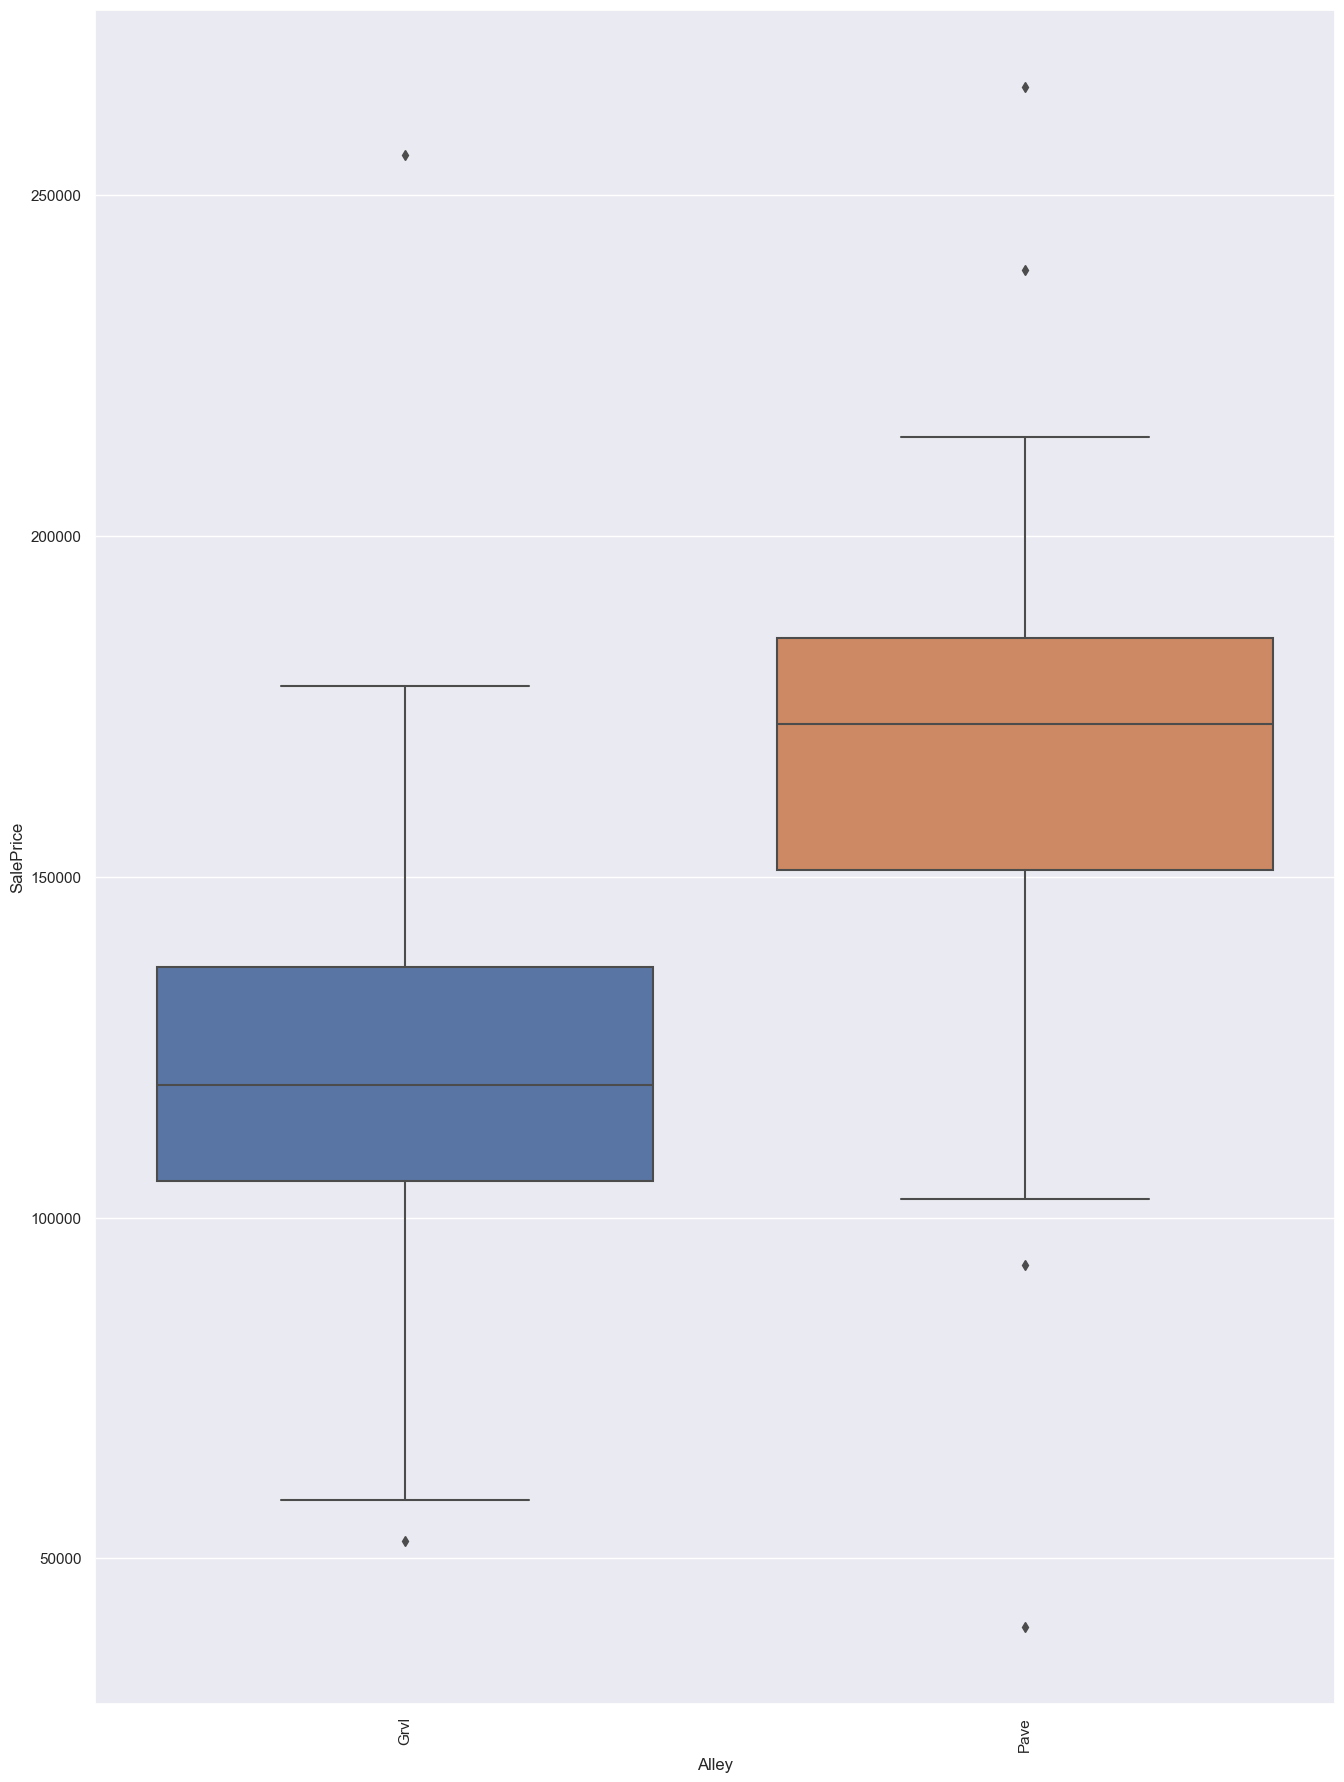

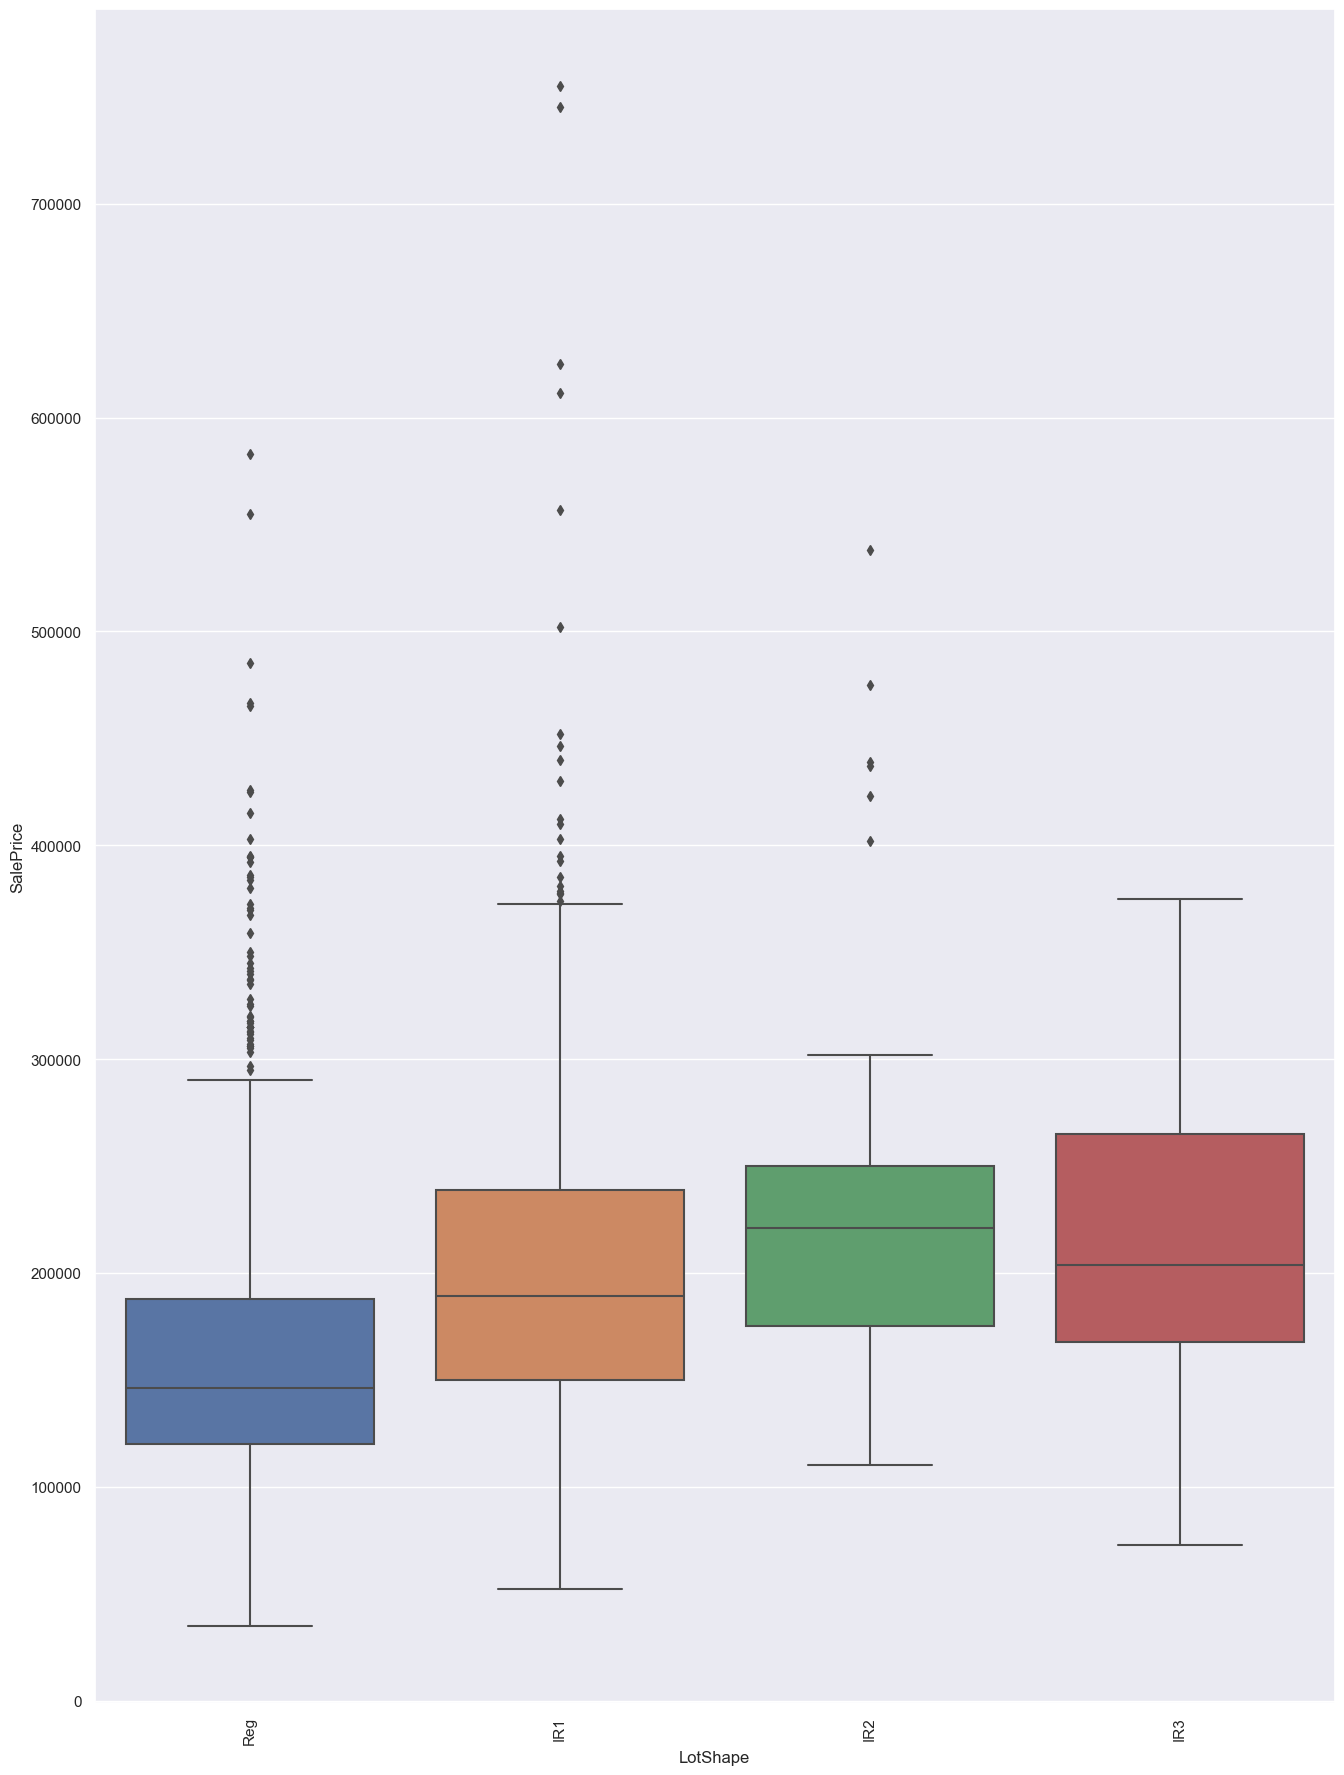

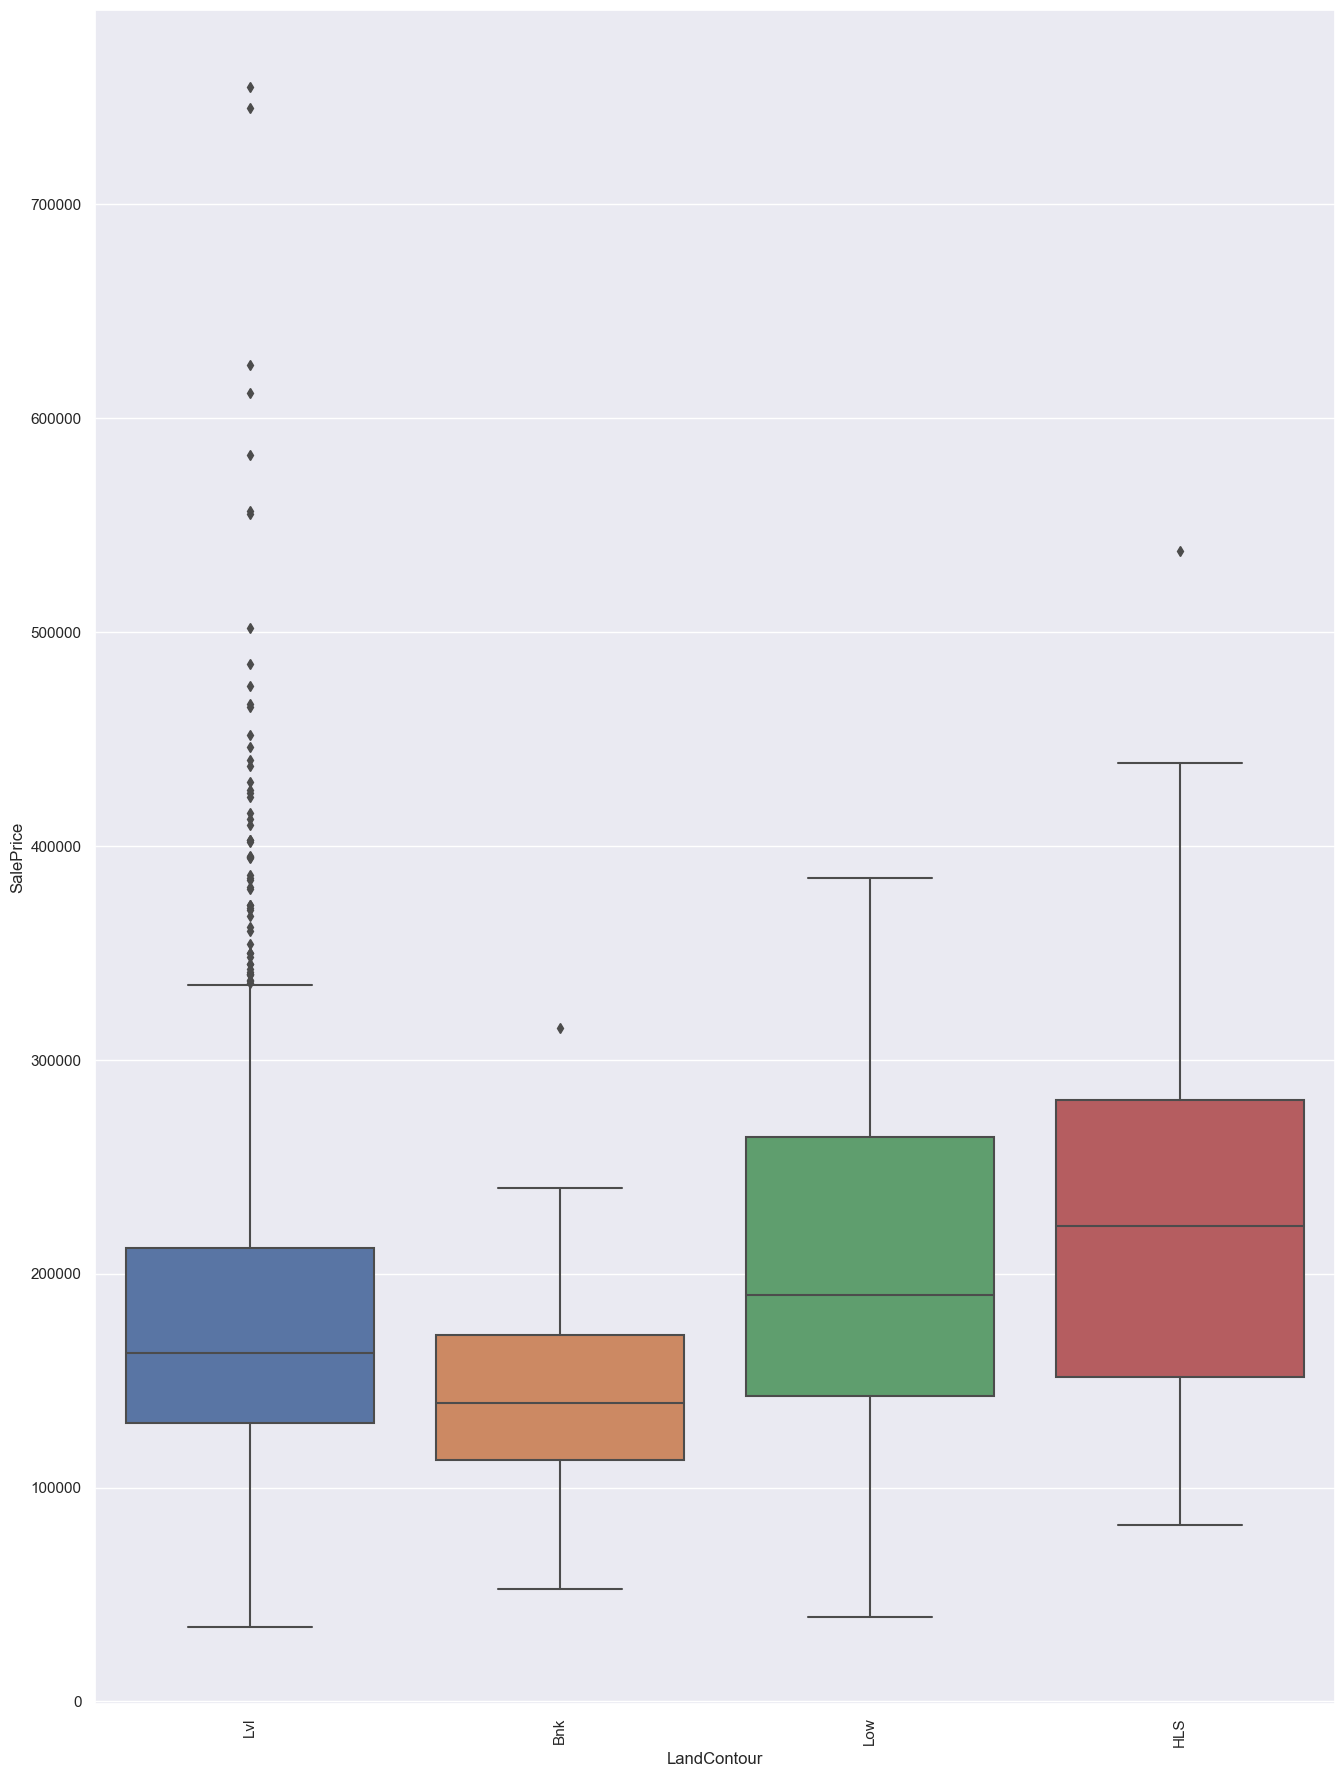

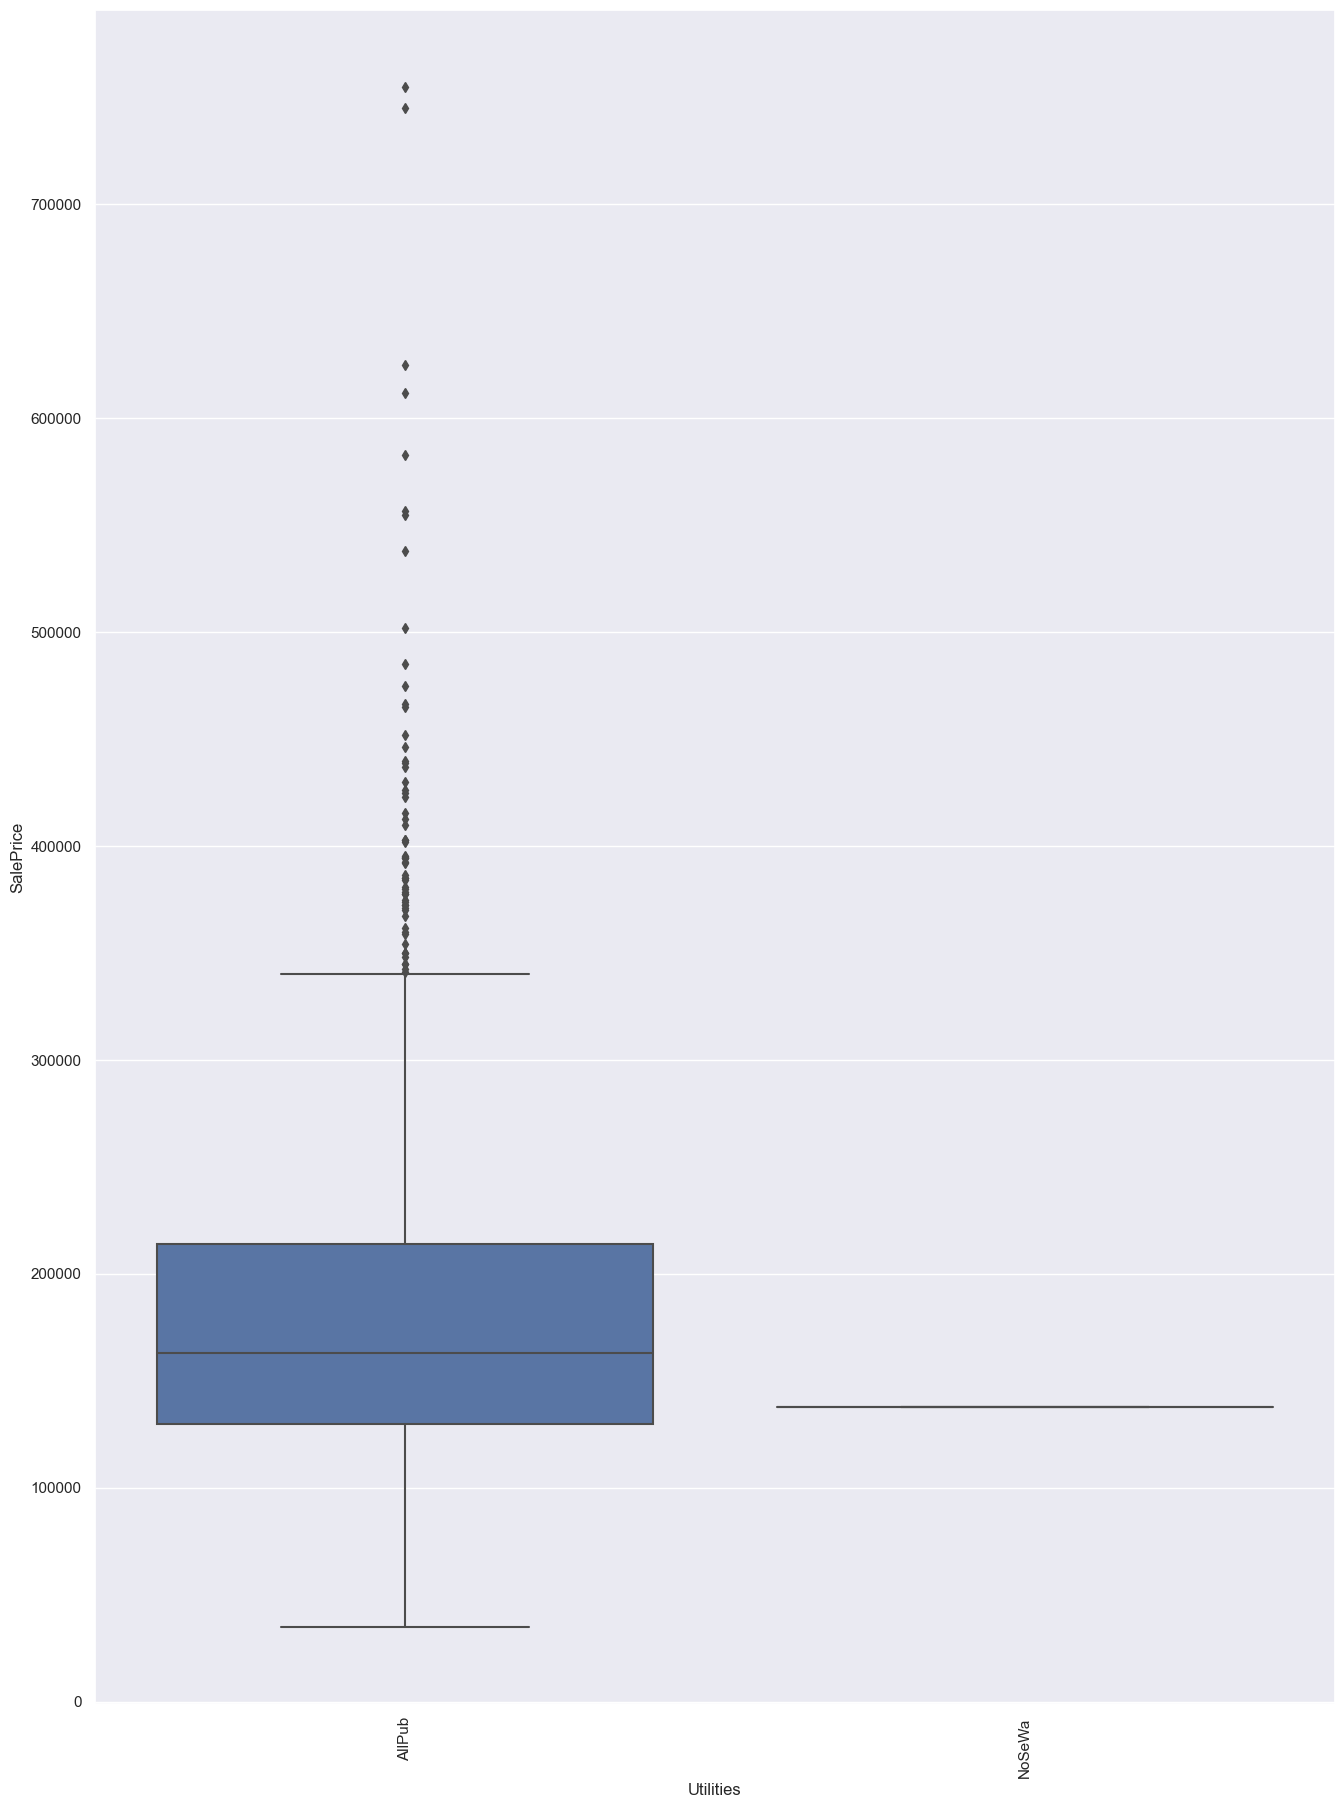

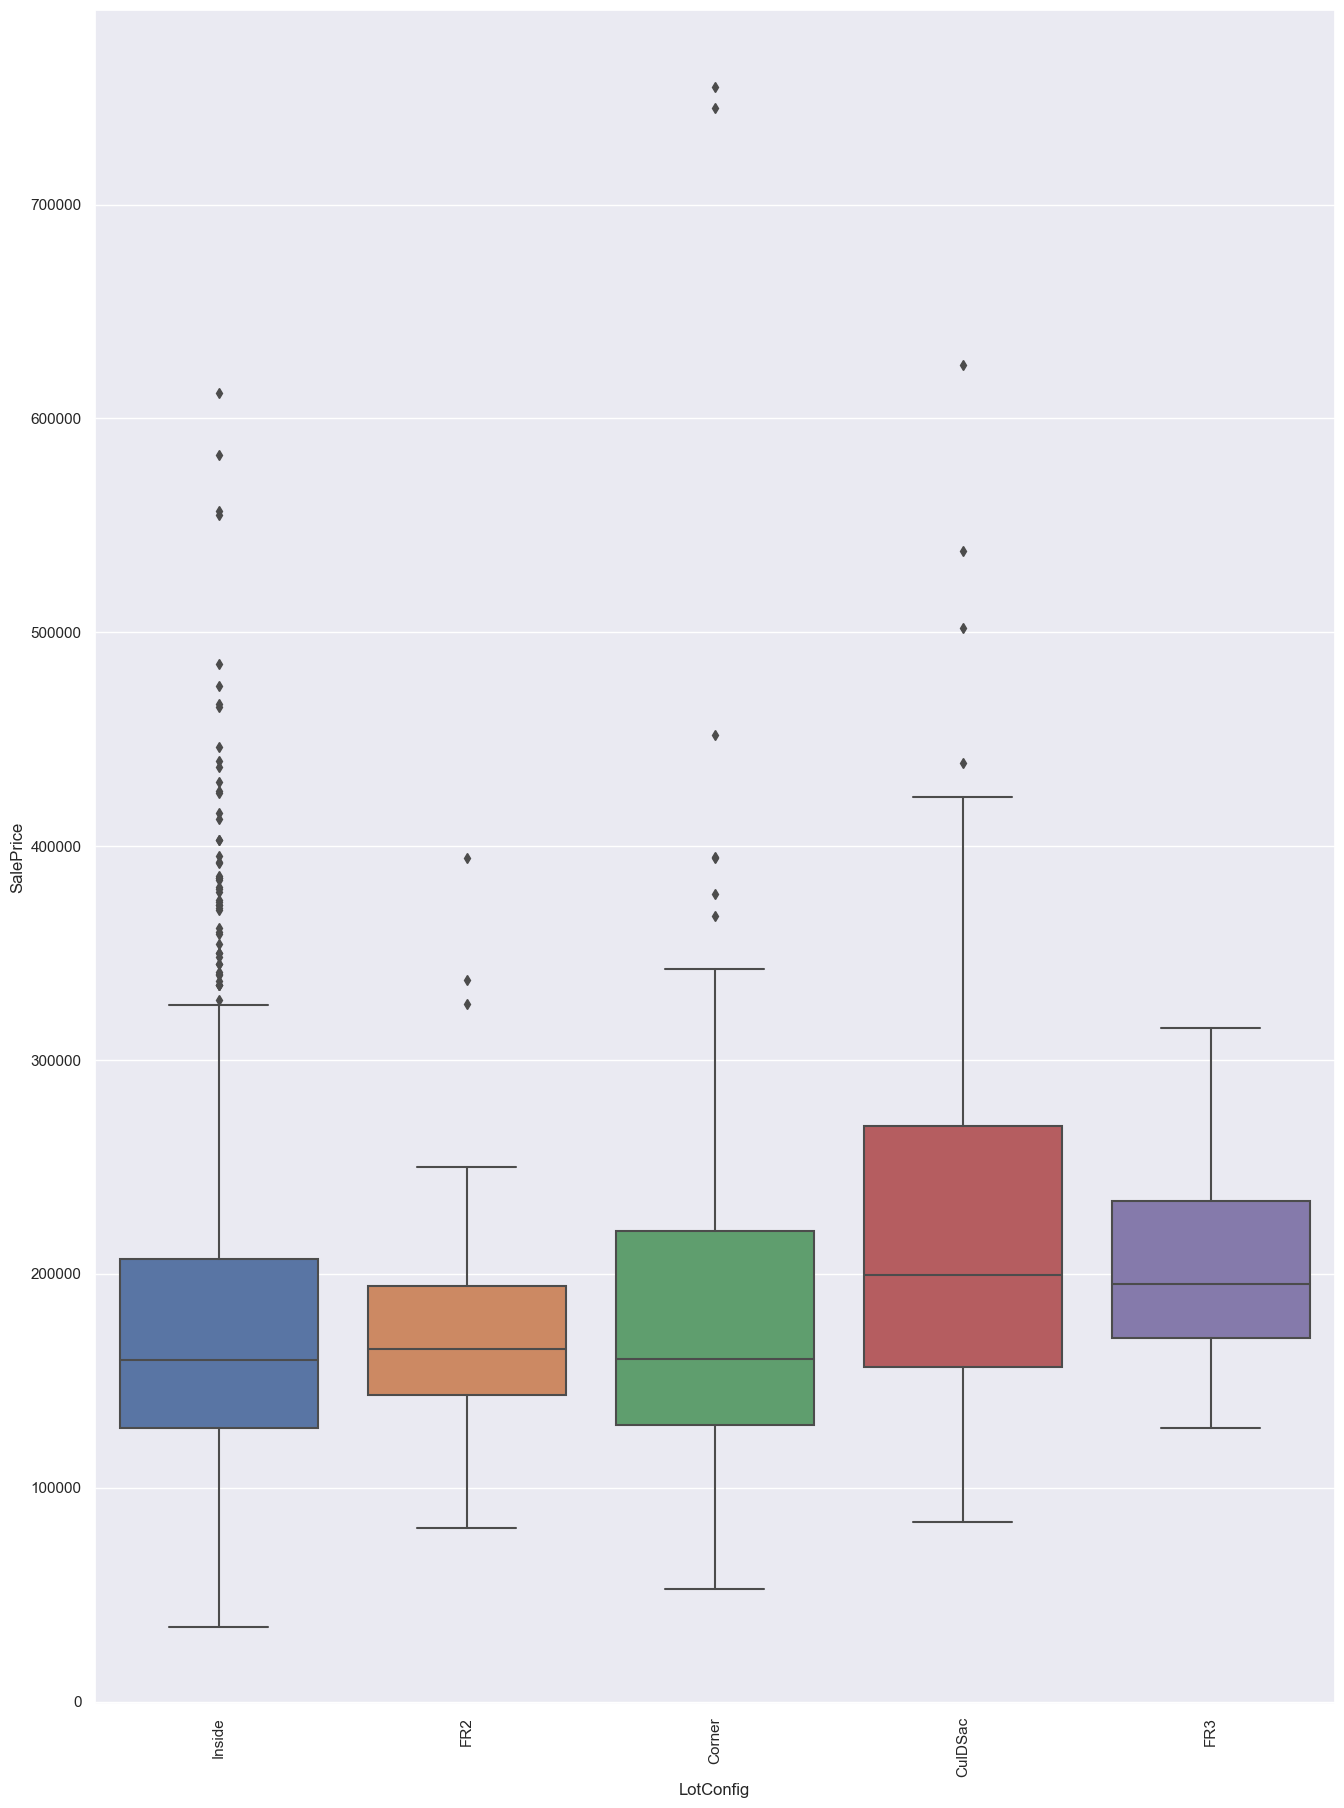

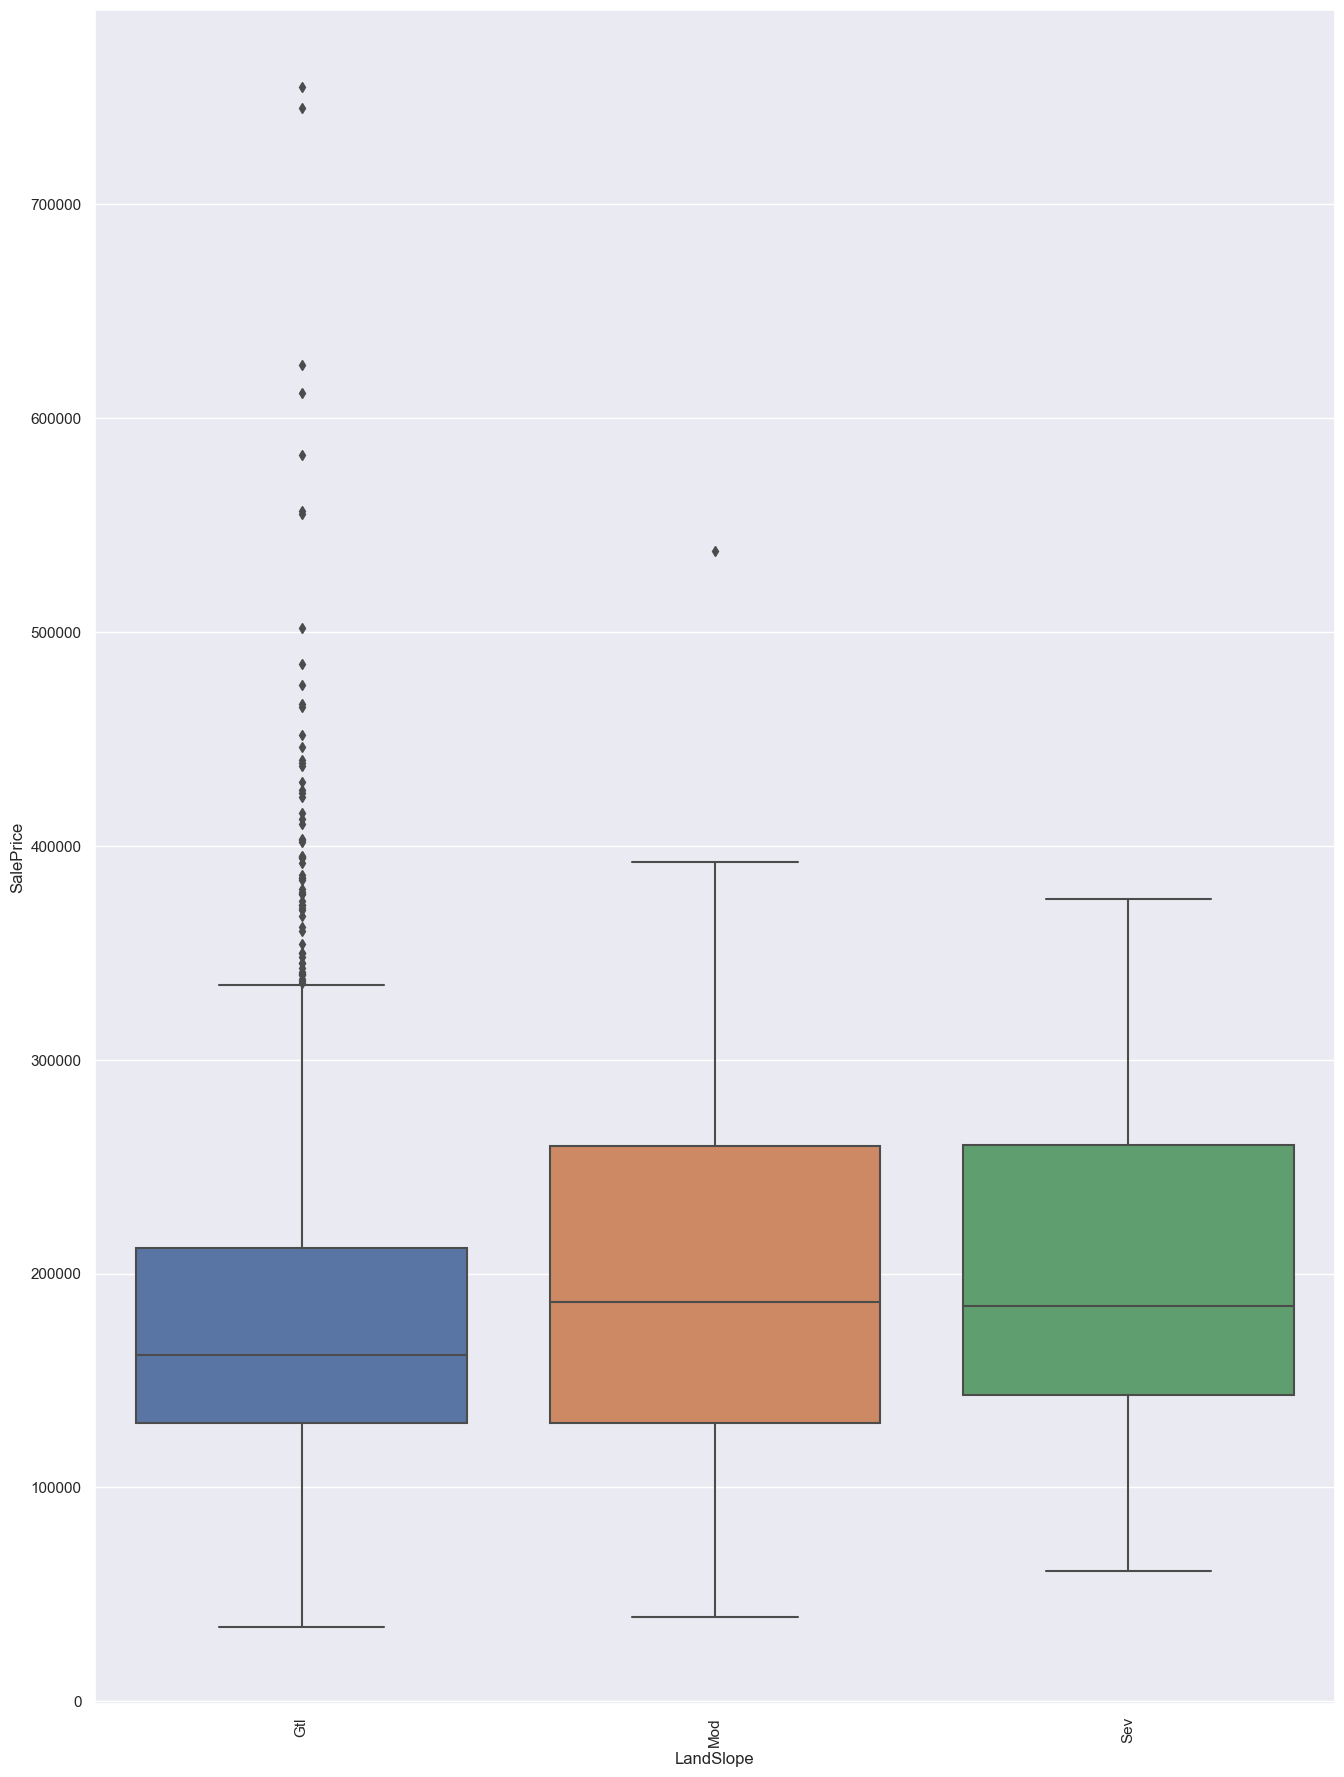

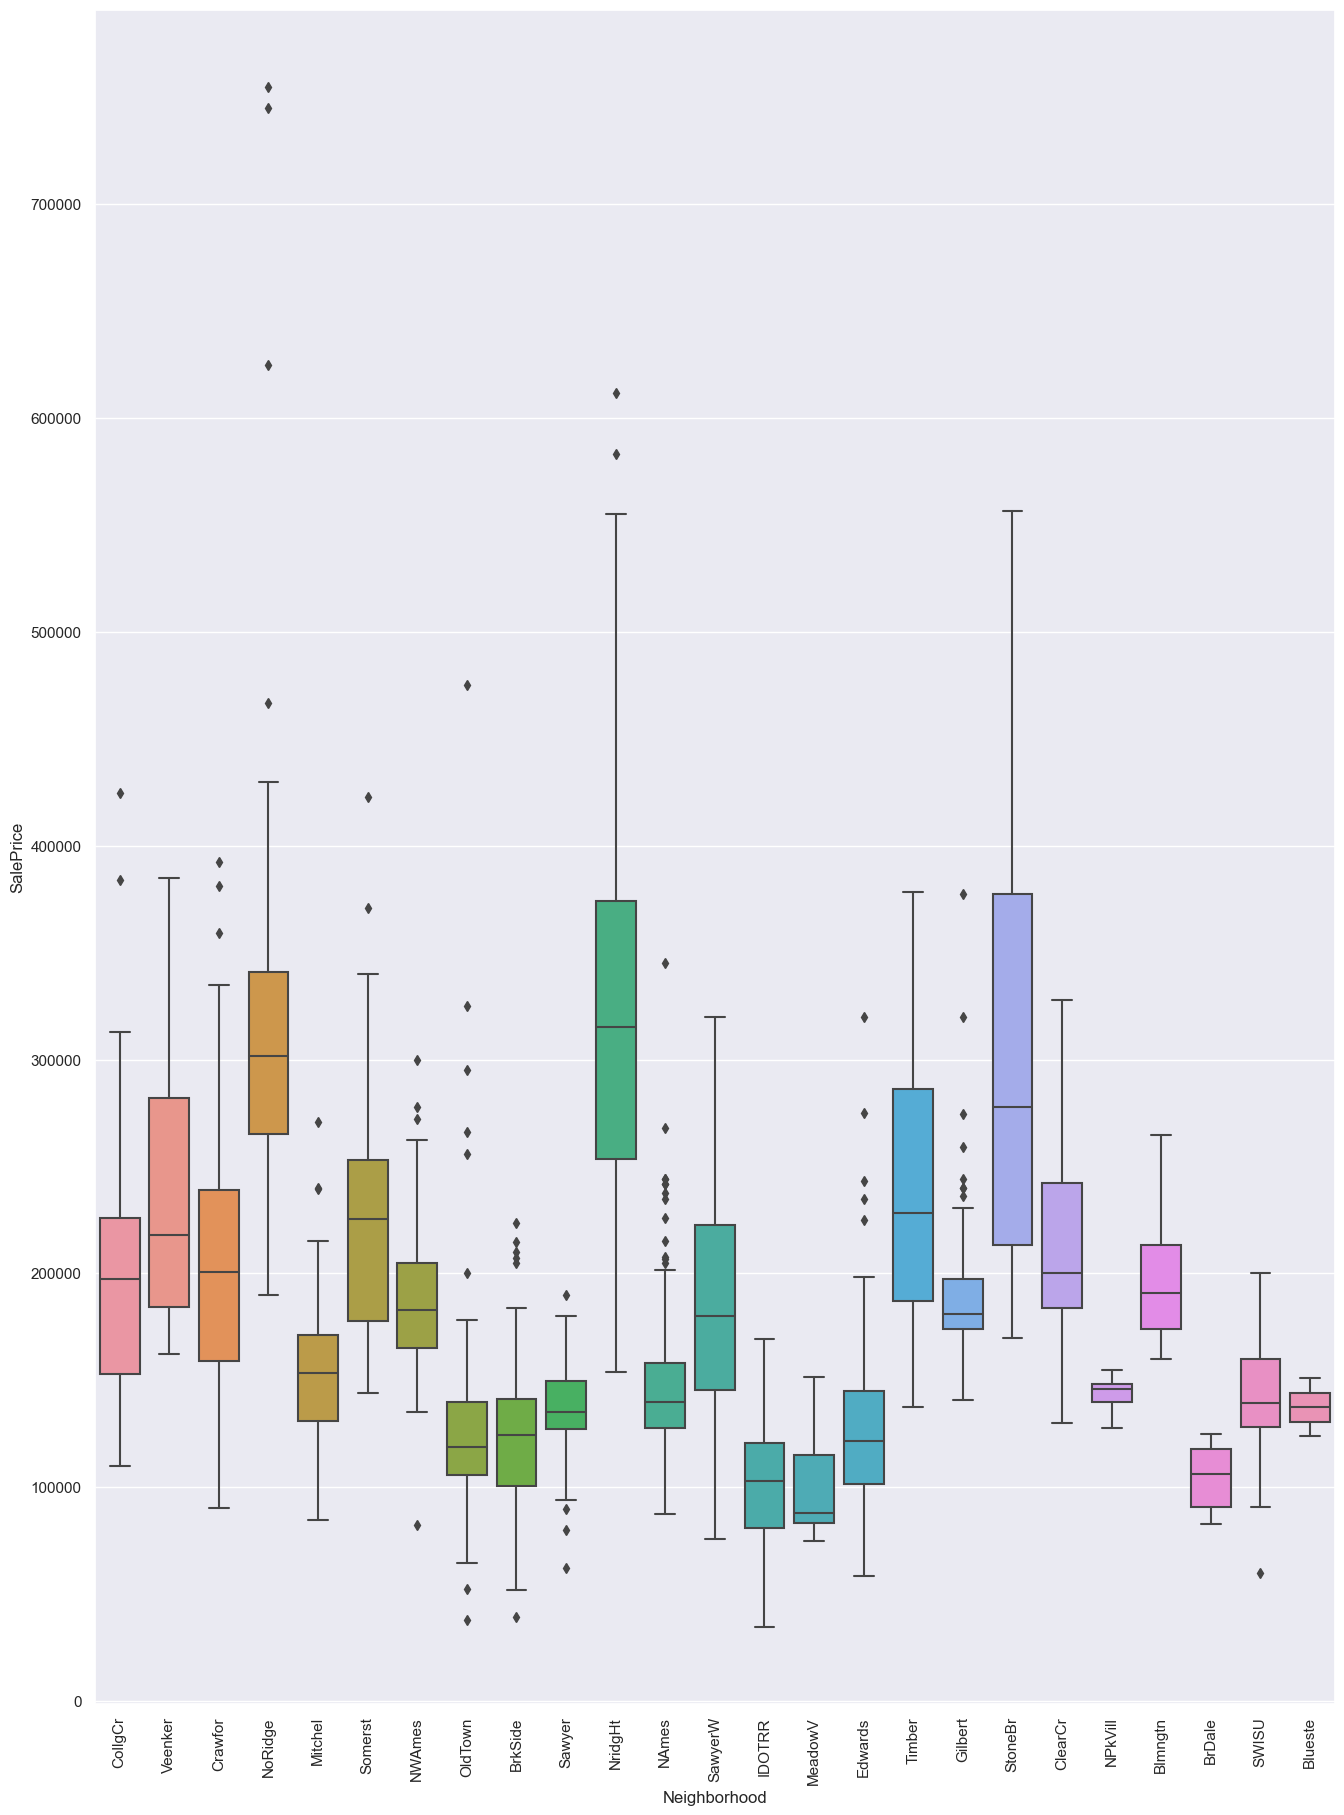

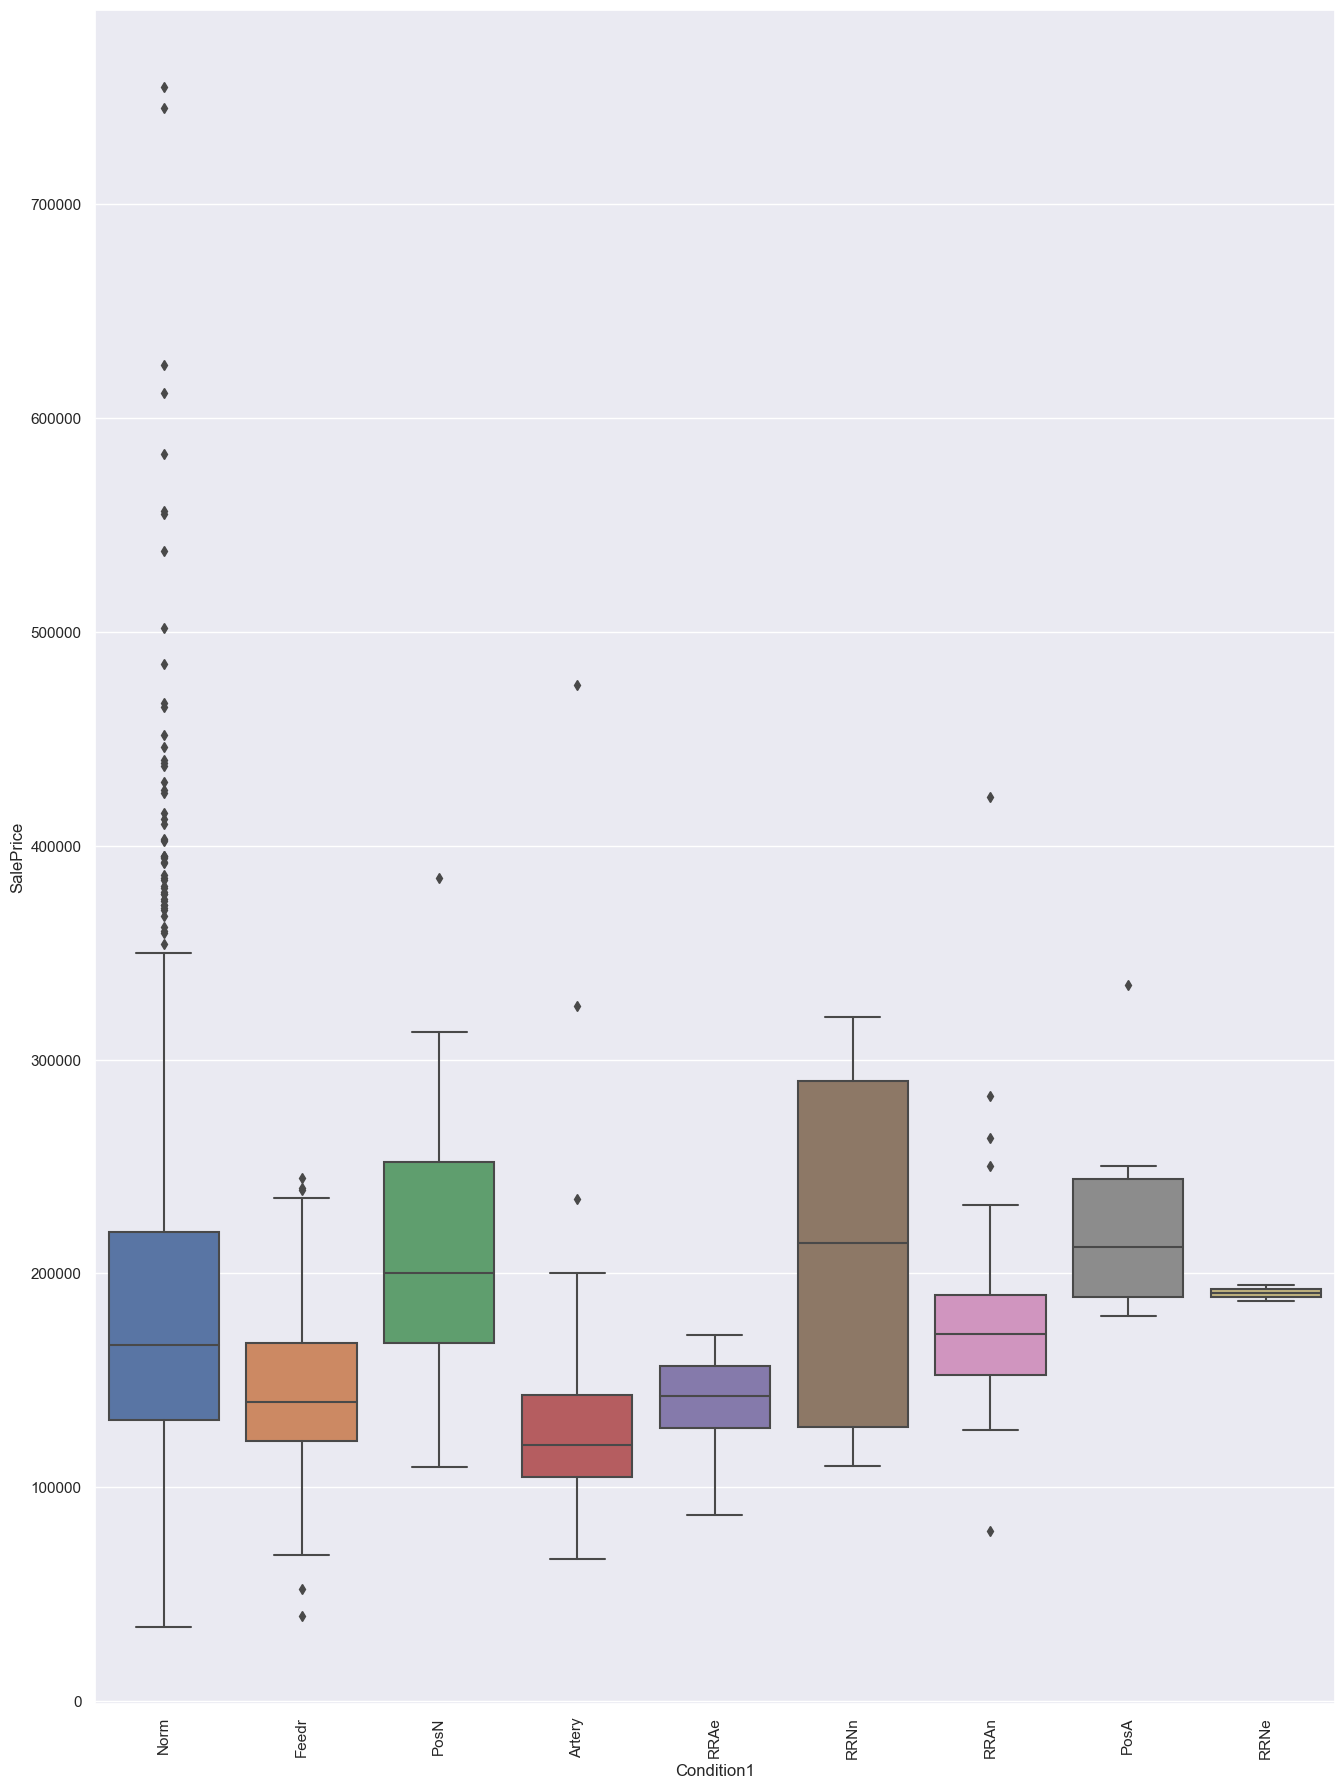

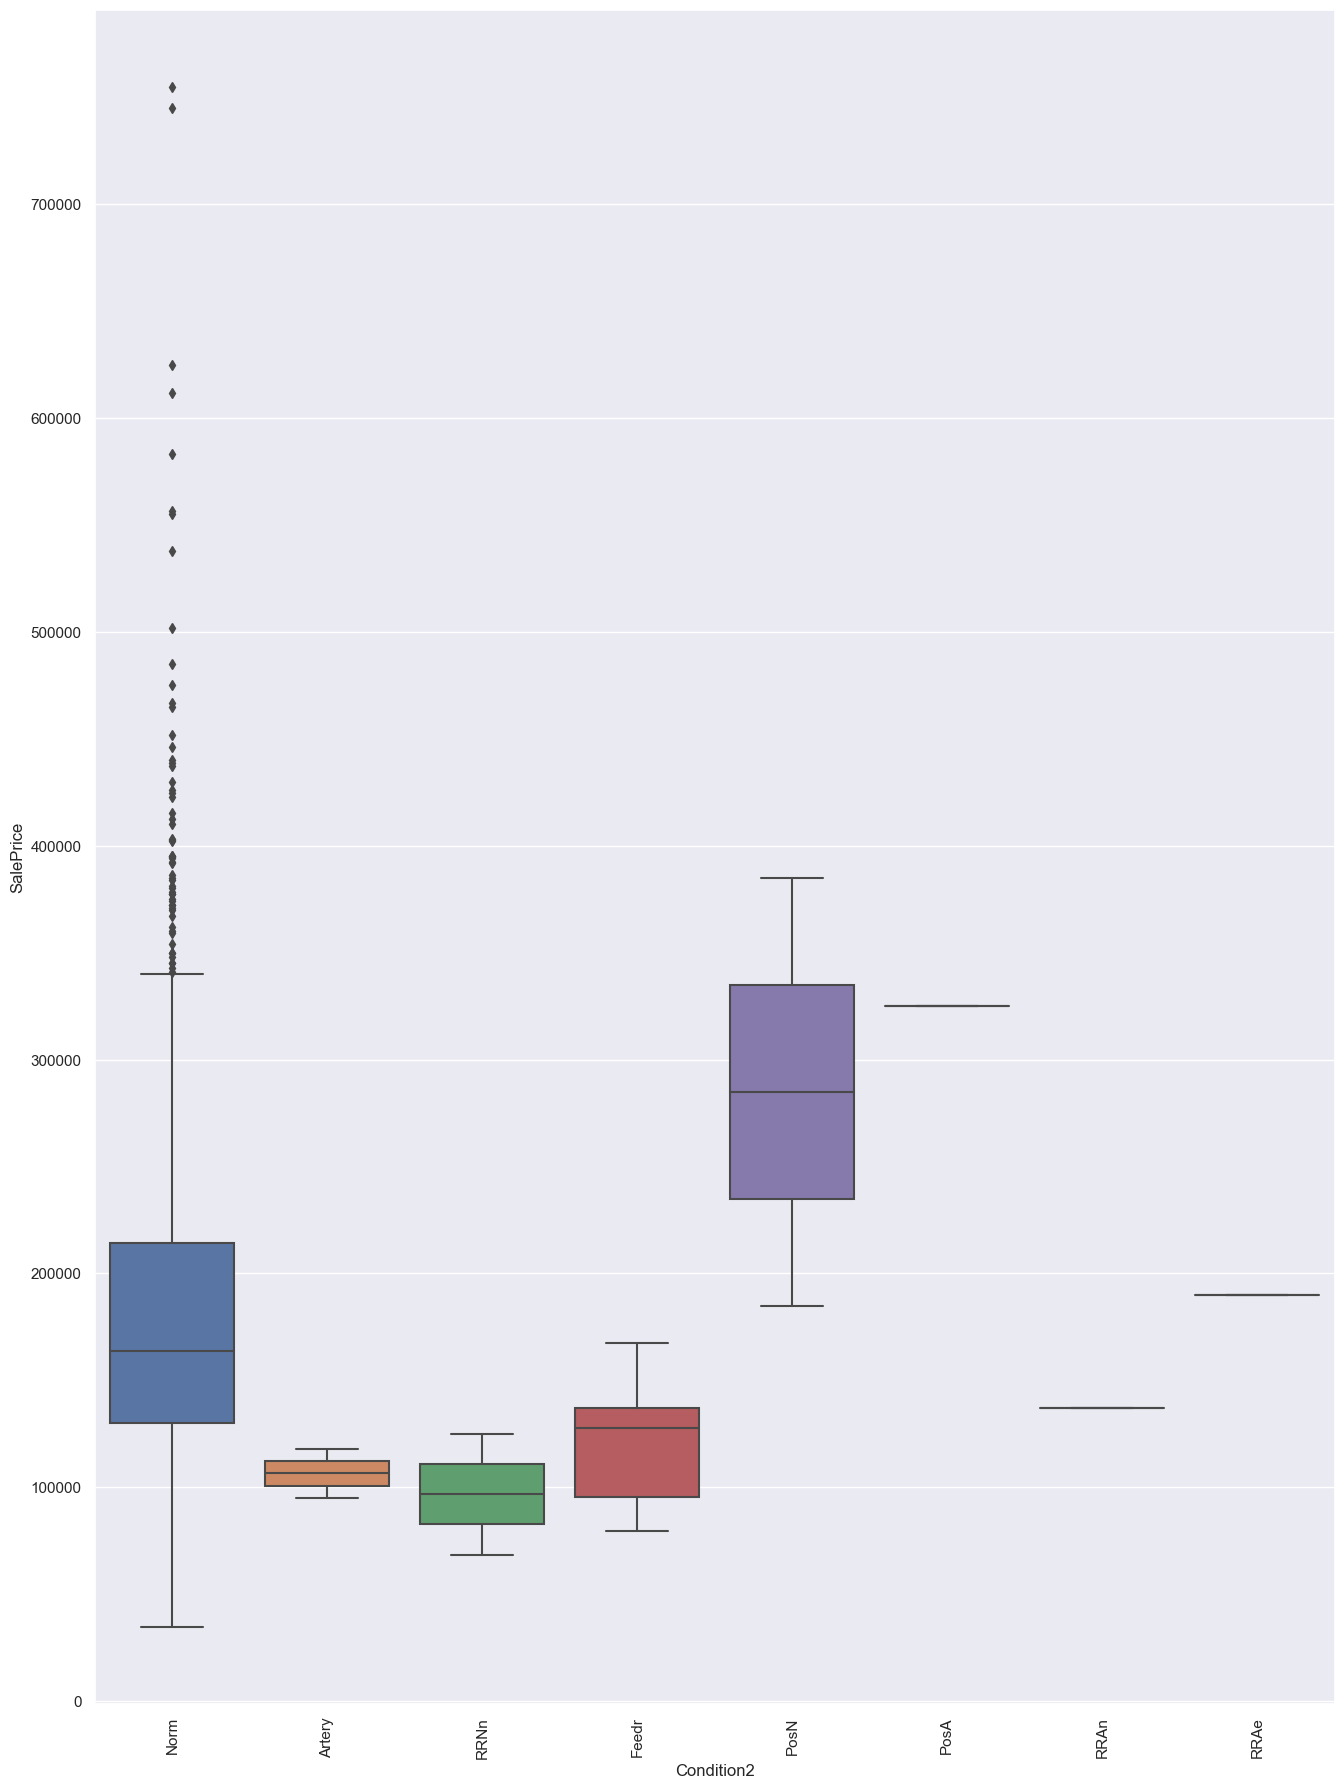

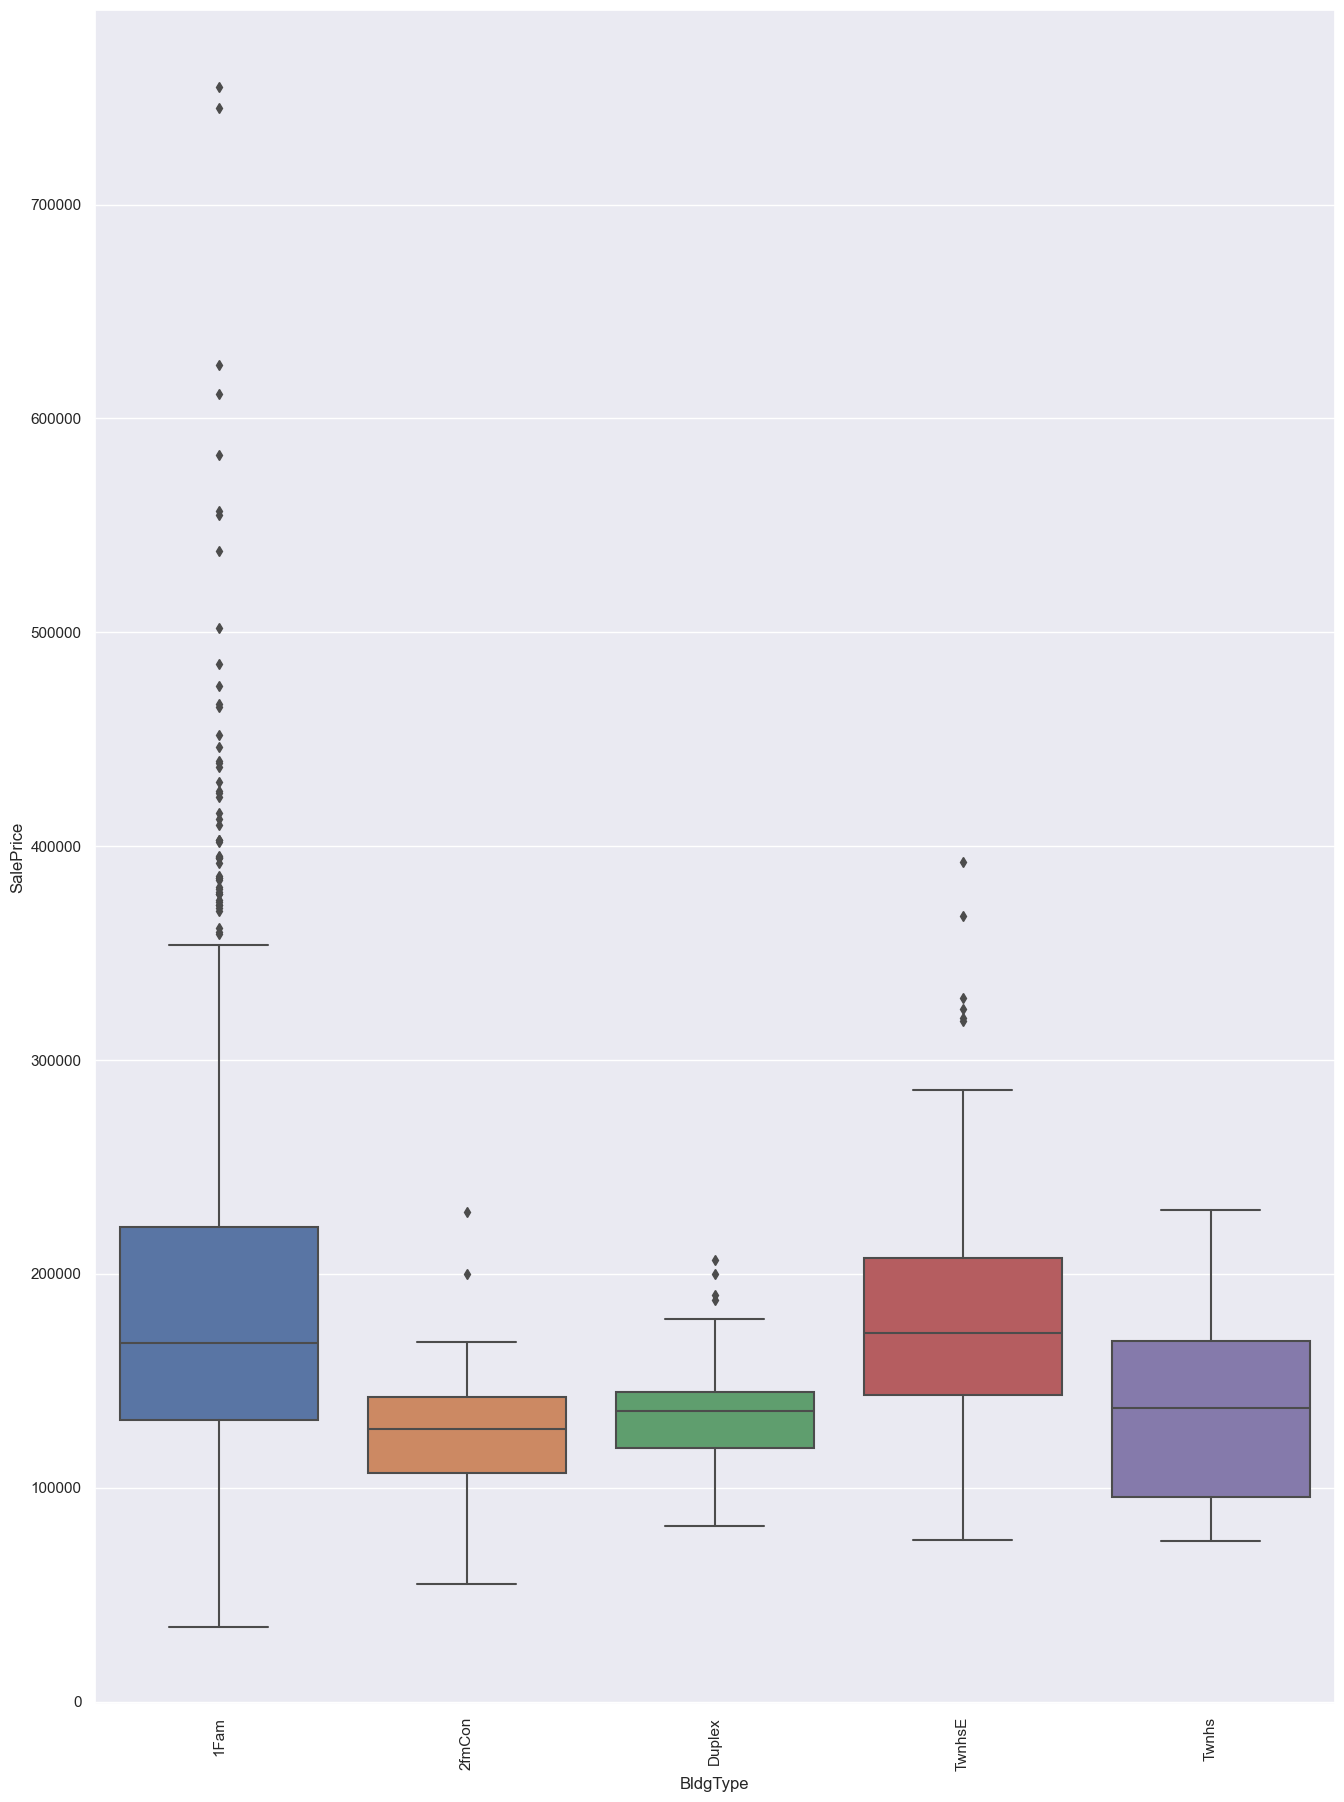

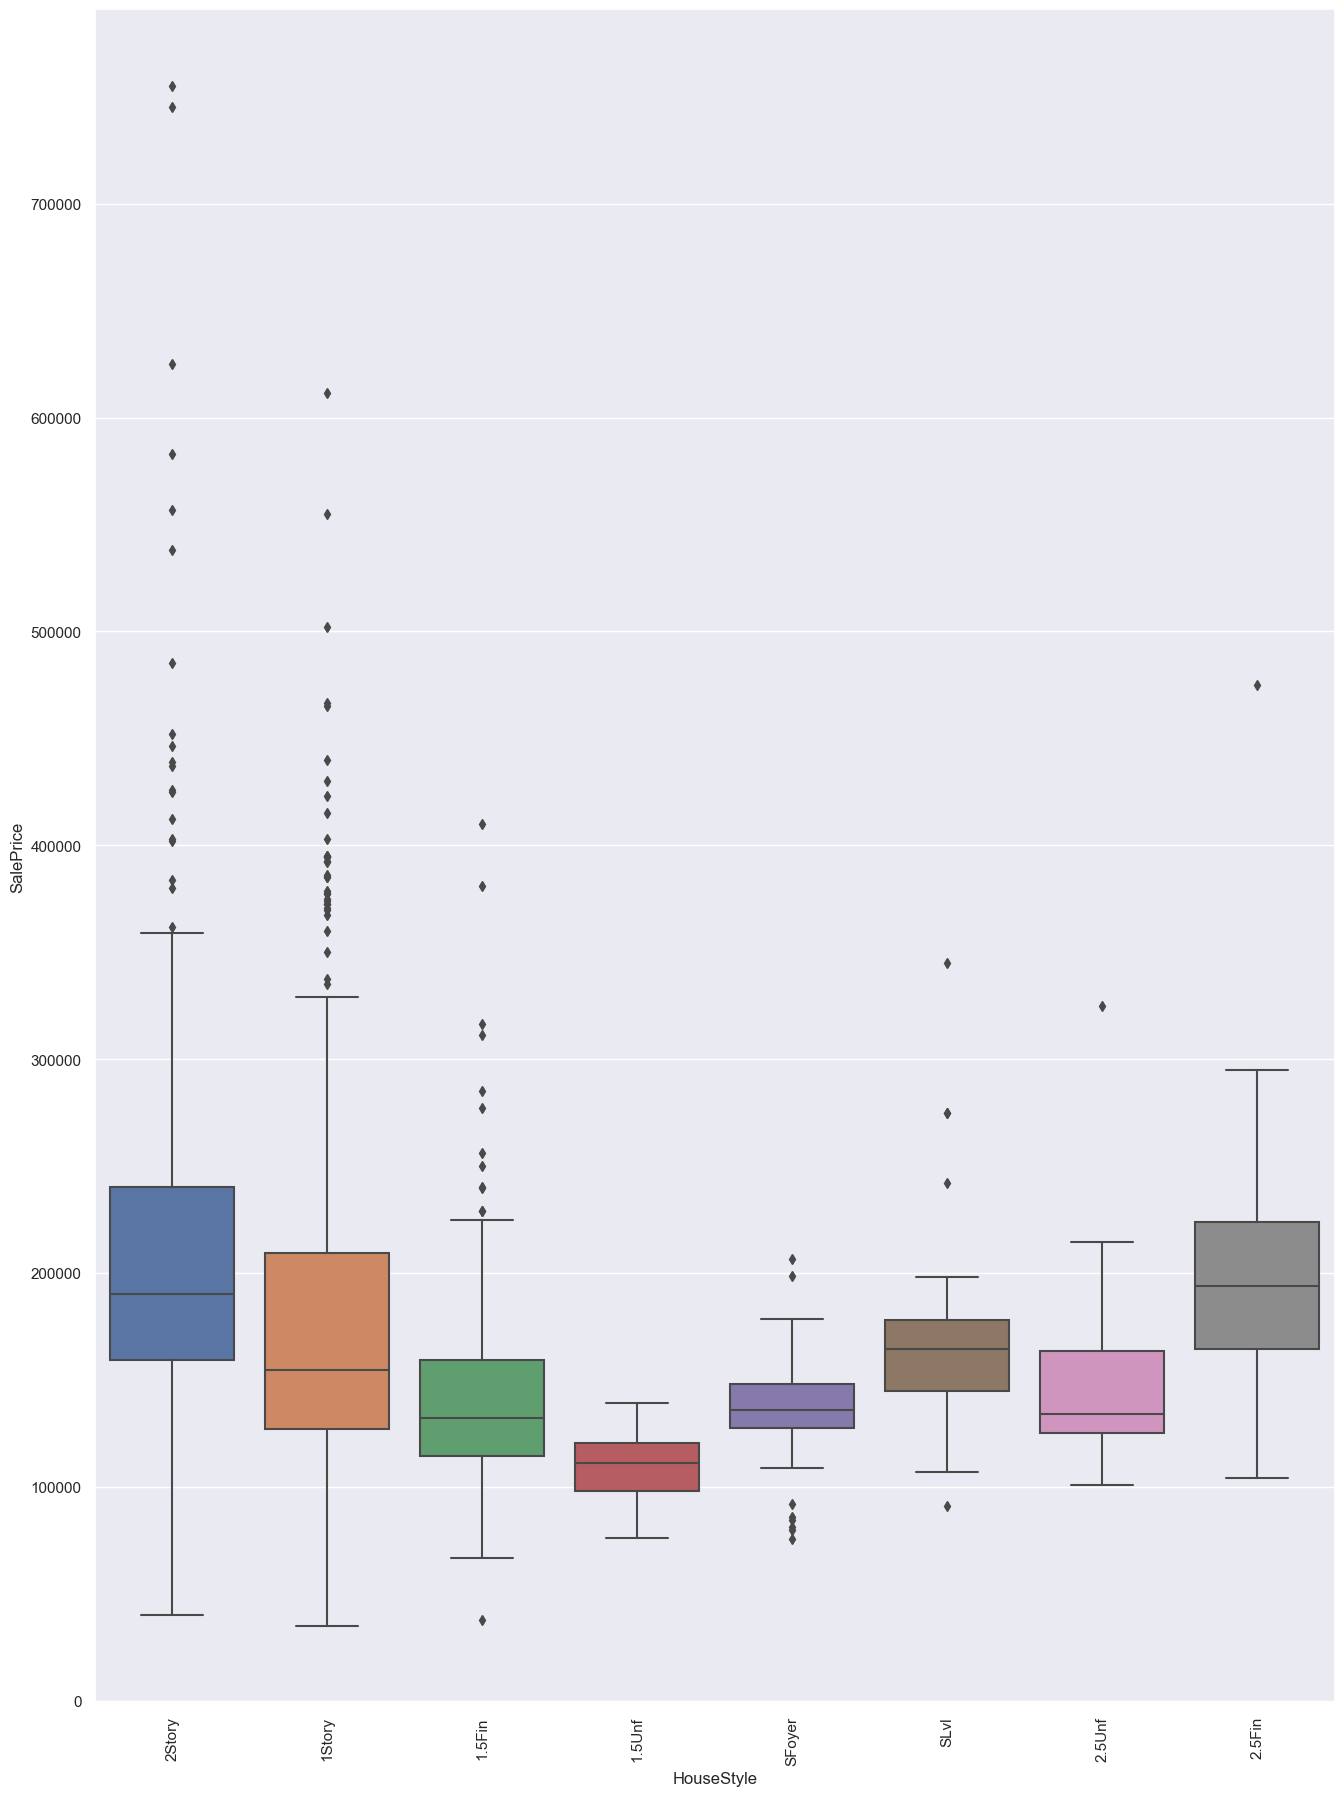

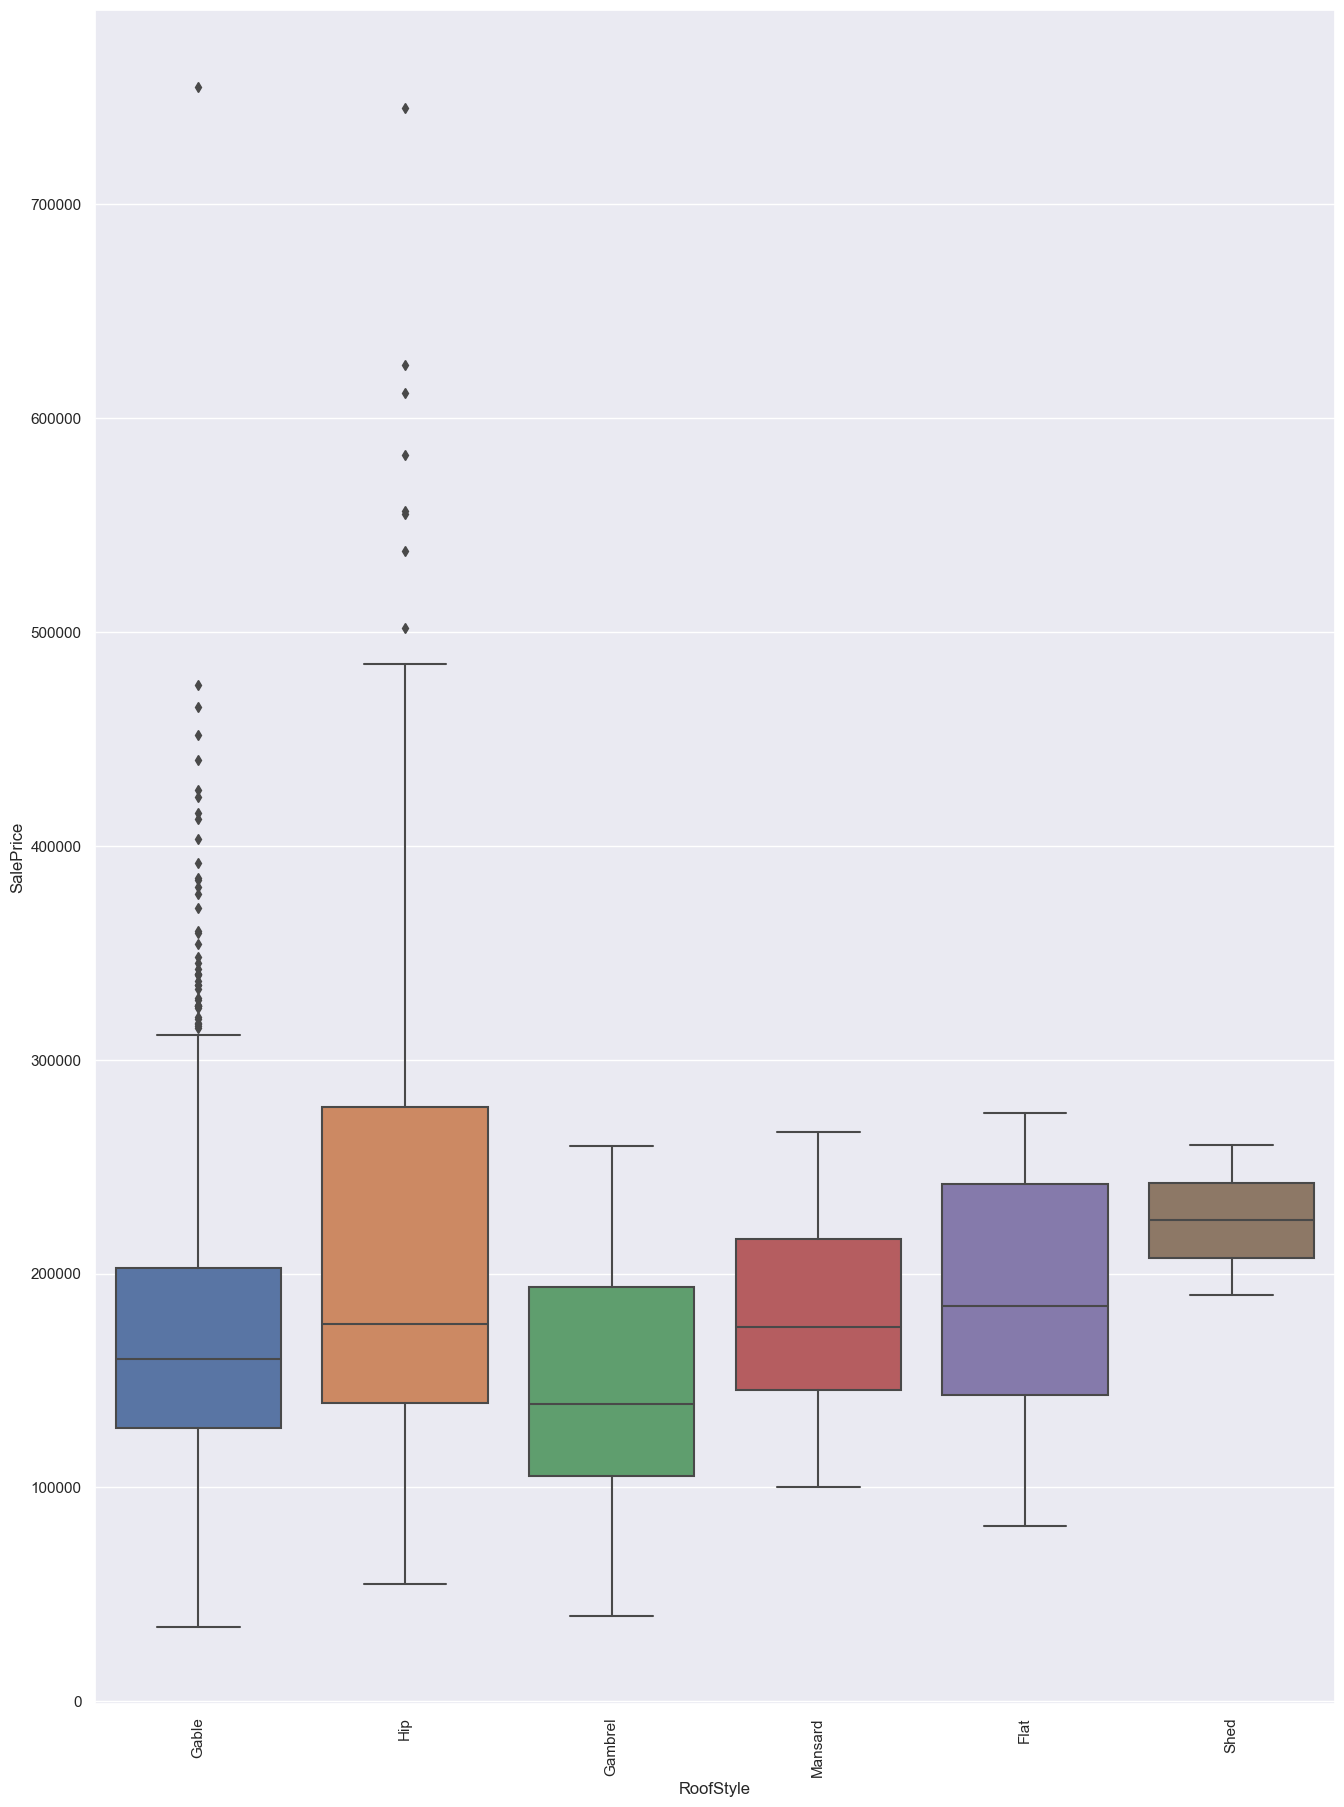

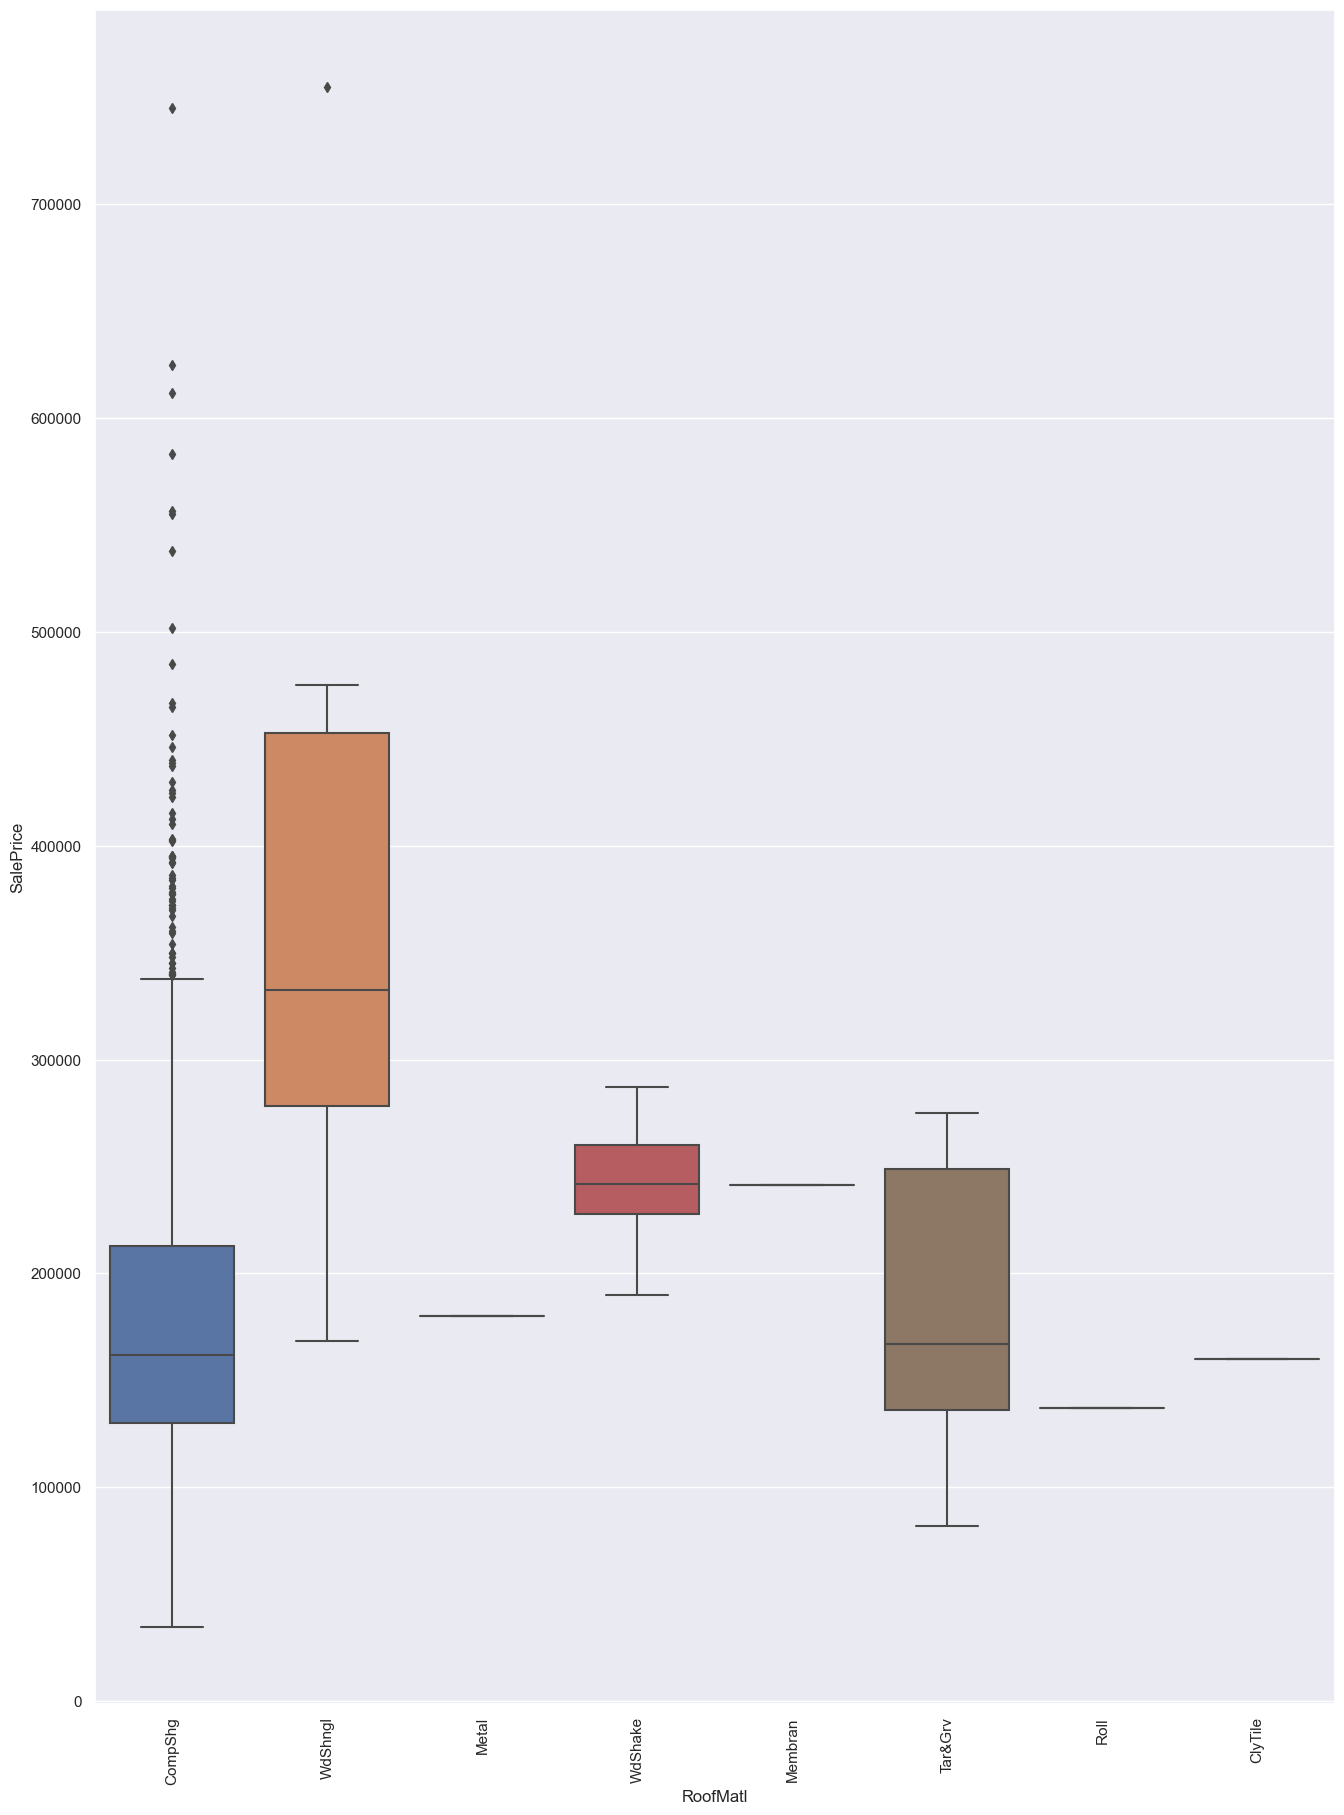

In [25]:
for cat in cat_df.dtypes[:15].index.values:
    plt.figure(figsize=(16, 22))
    plt.xticks(rotation=90)
    sns.boxplot(x=cat, y='SalePrice', data=df)    
    plt.show()

Regarding the categorical features, we will consider following:

- Deal with missing values on categorical attributes
- Transforming categorical attributes to numerical values (LabelEncode, LabelBinaryEncode, One-Hot-Encode, ...)

In [26]:
df.drop(columns='Id',axis=1,inplace = True) 

In [27]:
# Handling Null Values
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

In [28]:
# Replace null values in numeric columns with mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [29]:
# Replace null values in categorical columns with zero
df[categorical_columns] = df[categorical_columns].fillna(0)

In [30]:
# Save the cleaned dataset
df.to_csv('./Dataset/Cleaned.csv', index = False)

In [31]:
df = pd.read_csv('./Dataset/Cleaned.csv')

In [32]:
null_values = df.isnull().sum()
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
Kit

# Feature Engineering Steps:

In [33]:
# 1. Combine the square foot features into one total area feature
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# 2. Create a binary feature 'HasGarage' to indicate whether the house has a garage or not
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

# 3. Create a binary feature 'HasBsmt' to indicate whether the house has a basement or not
df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# 4. Create a binary feature 'HasFireplace' to indicate whether the house has a fireplace or not
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 5. Create a feature 'YearsSinceRemodel' indicating years since the last remodel
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

# 6. Drop columns that were used to create new features or are no longer needed
df = df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'YearRemodAdd'])

# 7. One-Hot Encoding for categorical variables
df = pd.get_dummies(df, columns=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape',
                                 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                                 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                                 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                                 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                                 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
                                 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'], 
                    drop_first=True)

# 8. Log transform the target variable 'SalePrice' to make it more normally distributed
df['SalePrice'] = df['SalePrice'].apply(lambda x: np.log1p(x))

# Now you have a feature-engineered dataset ready for machine learning

# Save the feature-engineered dataset
df.to_csv('./Dataset/Feature_Engineered.csv', index=False)

In [34]:
# Load the feature-engineered dataset
df = pd.read_csv('./Dataset/Feature_Engineered.csv')

# Remove rows with unique 'SalePrice' values
df = df[df.groupby('SalePrice')['SalePrice'].transform('count') > 1]

# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df['SalePrice'])

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (789, 273)
X_test shape: (264, 273)
y_train shape: (789,)
y_test shape: (264,)


In [35]:
# Define your features (X) and target (y)
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the data into training and testing sets with stratification based on 'SalePrice'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Create a DataFrame to display predicted and actual values
results_df = pd.DataFrame({'Actual SalePrice': y_test, 'Predicted SalePrice': y_pred})

# Print the results
print(results_df)

      Actual SalePrice  Predicted SalePrice
553          11.589896            11.504492
133          12.301387            12.205200
1348         12.278398            12.328391
1456         12.254868            12.224871
84           12.034697            11.982465
...                ...                  ...
95           12.128117            12.194786
948          12.167857            12.258337
16           11.911708            11.926467
461          11.951187            11.993768
810          12.106258            13.714674

[158 rows x 2 columns]
